# <font face="Trebuchet MS" size=6 color=black >COMP41680 Assignment 1

## <font face="Trebuchet MS" size=4 color=black >**Abstract:**

   <font face="Trebuchet MS" size=2.5 color=black >    &emsp; &emsp; TMDB is a movie database, the source of data for this assignment. The assignment focuses on analyzing and studying the data of 20th-century movies to show the trend in the movie market.

In [1]:
# the library needed
import csv
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
# !pip install squarify
import squarify

## <font face="Trebuchet MS" size=4 color=black >Task 1: Identify the suitable API 

### <font face="Trebuchet MS" size=3 color=green > API introduction

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; The API provides movie data provided by http://www.themoviedb.org/  
    &emsp; &emsp; The sample style of API: https://api.themoviedb.org/3/movie/550?api_key=798b9d46254c561c622bfa9ed97f64ba&emsp; 
    &emsp; &emsp;<br> This API is free but requires a one-by-one data download. The key is: '798b9d46254c561c622bfa9ed97f64ba'.
    

In [2]:
key = '798b9d46254c561c622bfa9ed97f64ba'

## <font face="Trebuchet MS" size=4 color=black >Task 2: Raw data collection

###  <font face="Trebuchet MS" size=3 color=black > 2.1 Get data from API  

 <font face="Trebuchet MS" size=2.5 color=black >    &emsp; &emsp; Because it is necessary to get the data from the website one by one, the middle number part of the website link is truncated. Numbers will be added later.

In [3]:
# sample: https://api.themoviedb.org/3/movie/550?api_key=798b9d46254c561c622bfa9ed97f64ba&emsp

url_movie = 'https://api.themoviedb.org/3/movie/'

url_2=       '?api_key=' + key

###  <font face="Trebuchet MS" size=3 color=black >2.3 Parsing and transferring 

&emsp; &emsp;  <font face="Trebuchet MS" size=2.5 color=black > The obtained data is contained in JSON, then transformed into dictionary data. On request, the request is successful only if status_code = 200; otherwise, failure returns null.

In [4]:
def get_data(num):
    r = requests.get(url_movie + num + url_2 )
    if(r.status_code == 200):
        content = json.loads(r.text)
        return Appropriate_data(content)

    return ''
    
    
    

###  <font face="Trebuchet MS" size=3 color=black > 2.4 Data Cleaning

&emsp; &emsp;  <font face="Trebuchet MS" size=2.5 color=black > Retain the fields that need to be analyzed.

In [5]:
# Required fields.
labels = ['budget','genres','original_language','popularity','production_countries','release_date','revenue','runtime','vote_average']

def Appropriate_data(content):
    if 'success' in content.keys():
        return ''
    temp = {}
    for i in content:
        if (i == 'budget'):

            temp[i] = str(content[i])

        if (i == 'genres'):
            n = ''
            for j in content[i]:
                for k in j:
                    if(k == 'name'):
                        n = n + j[k] +','
            temp[i] = n

        if (i == 'original_language'):
            temp[i] = content[i]

        if (i == 'popularity'):
            temp[i] = content[i]
        if (i == 'production_countries'):
            n = ''
            for j in content[i]:
                for k in j:
                    if (k == 'name'):
                        n = n + j[k] + ','
            temp[i] = n
        if (i == 'release_date'):
            temp[i] = content[i][0:4]
        if (i == 'revenue'):
            temp[i] = str(content[i])
        if (i == 'runtime'):
            temp[i] = content[i]
        if (i == 'vote_average'):
            temp[i] = content[i]

    return temp

###  <font face="Trebuchet MS" size=3 color=black > 2.3 Storing in appropriate format

&emsp; &emsp;  <font face="Trebuchet MS" size=2.5 color=black > Data saved in CSV format. Collect valid data from the first 20,000 data items.

In [6]:
with open('csv_dct.csv', 'w',newline='') as f:
    writer = csv.DictWriter(f, fieldnames=labels,)
    writer.writeheader()
    for i in range(20000):
        dct_arr = [get_data(str(i))]
       
        if(len(dct_arr[0]) != 0):
            for elem in dct_arr:
                writer.writerow(elem)

##   <font face="Trebuchet MS" size=3 color=black > Task 3: Data processing 

&emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=black > Outliers or missing values in the obtained data need to be processed further.

### <font face="Trebuchet MS" size=3 color=black > 3.1: Reading the data from the csv files saved.

In [7]:
data = pd.read_csv('csv_dct.csv')
data.describe()

,budget,popularity,release_date,revenue,runtime,vote_average
count,1.209600e+04,12096.000000,12088.000000,1.209600e+04,12096.000000,12096.000000
mean,9.832034e+06,13.567830,1992.405113,2.713343e+07,99.175513,5.950118
std,2.382788e+07,22.203409,18.424728,8.982582e+07,29.909587,1.682774
min,0.000000e+00,0.600000,1888.000000,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,3.387000,1985.000000,0.000000e+00,89.000000,5.503750
50%,0.000000e+00,9.084500,2000.000000,0.000000e+00,98.000000,6.300000
75%,8.000000e+06,15.573500,2006.000000,1.277145e+07,110.000000,6.931000
max,3.800000e+08,596.230000,2018.000000,2.920357e+09,540.000000,10.000000


&emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=black > We can see that budget, revenue,vote_average, and runtime have a minimum value of 0. The values of these columns may be missing.

### <font face="Trebuchet MS" size=3 color=black > 3.3: Missing value handling

<font face="Trebuchet MS" size=2.5 color=black > Due to a large amount of data, the missing values will be replaced by the average value.  

In [8]:
data['budget'] = data['budget'].replace(0,data['budget'].mean())
data['revenue'] = data['revenue'].replace(0,data['revenue'].mean())
data['runtime'] = data['runtime'].replace(0,data['runtime'].mean())
data['vote_average'] = data['vote_average'].replace(0,data['vote_average'].mean())
data.describe()

,budget,popularity,release_date,revenue,runtime,vote_average
count,1.209600e+04,12096.000000,12088.000000,1.209600e+04,12096.000000,12096.000000
mean,1.570557e+07,13.567830,1992.405113,4.351533e+07,100.823518,6.220667
std,2.180626e+07,22.203409,18.424728,8.576570e+07,26.989108,1.071724
min,1.000000e+00,0.600000,1888.000000,1.000000e+00,1.000000,0.500000
25%,9.832034e+06,3.387000,1985.000000,2.713343e+07,90.000000,5.700000
50%,9.832034e+06,9.084500,2000.000000,2.713343e+07,98.000000,6.300000
75%,9.832034e+06,15.573500,2006.000000,2.713343e+07,110.000000,6.931000
max,3.800000e+08,596.230000,2018.000000,2.920357e+09,540.000000,10.000000


### <font face="Trebuchet MS" size=3 color=black > 3.4 Data Extraction

&emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=black > Extract the data that will be used later.  

In [9]:
def get_details(movie_data, movie_details):
    dct = defaultdict(list)
    count = 0
    for i in movie_data:
        count = count + 1
        if (isinstance(i, list)):
            for j in i:
                if j != '':
                    dct[j].append(movie_details[count - 1])

    for i in dct.keys():
        dct[i] = pd.Series(np.array(dct[i]))
    details = []
    for i in dct.keys():
        details.append(dct[i].mean())

    return details
    
movie_type = data['genres'].str.split(',')

Popularity = get_details(movie_type,data['popularity'])

Runtime = get_details(movie_type,data['runtime'])
    
Vote_average = get_details(movie_type,data['vote_average'])

Budget = get_details(movie_type,data['budget'])

Revenue = get_details(movie_type,data['revenue'])

## <font face="Trebuchet MS" size=3 color=black > Task 4：Data Analysis and Visualization

### <font face="Trebuchet MS" size= 3 color=black >1.1 Movie Genres

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > In this collection of 12,000 pieces of data spanning the 20th century, The distribution of movie genres can reflect which subjects are the most popular movies at the time.

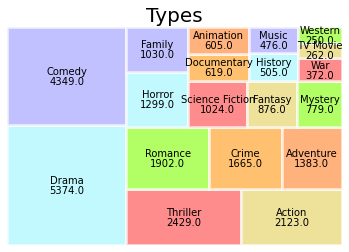

In [10]:

movie_type = movie_type.apply(pd.Series)
movie_type = movie_type.apply(pd.value_counts)
movie_type = movie_type.unstack().dropna().reset_index()

movie_type.columns =['level_0','type','counts']
movie_type_m = movie_type.drop(['level_0'],axis=1).groupby('type').sum().sort_values(by=['counts'],ascending=False).reset_index()

types = [i for i in movie_type_m.type]
types = types[1:]

counts = [i for i in movie_type_m.counts]
counts = counts[1:]

colors = ['#98F5FF','#9999ff','#FF4040','#E3CF57', '#7FFF00','#FF9912','#FF7F24']
plot = squarify.plot(
       sizes=counts,
       color = colors,
       label=types,
       value=counts,
       alpha = 0.6,
       edgecolor = 'white',# 
       linewidth =3, 
  )
plt.rc('font', size=10)
plot.set_title('Types',fontdict = {'fontsize':20})
plt.axis('off')
plt.tick_params(top = 'off', right = 'off')
plt.show()

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > It can be seen that Comedy, Drama, Thriller, Action, Romance, and Crime movies are more popular, indicating that these subjects are more popular subjects, of which Drama movies account for the most.

### <font face="Trebuchet MS" size= 3 color=black >1.2 Popularity of different types of movies

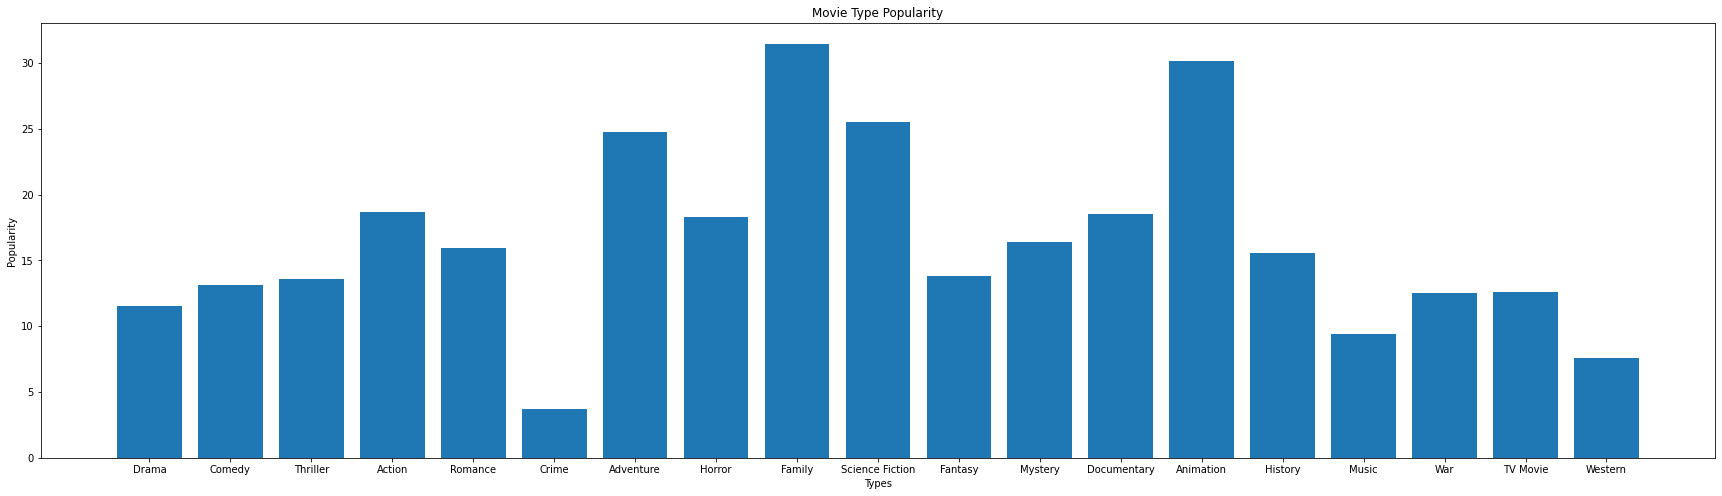

In [11]:
plt.figure(figsize=(30,8))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = types
y = Popularity

plt.bar(x,y)
plt.xlabel('Types')
plt.ylabel('Popularity')
plt.title('Movie Type Popularity')
plt.show()

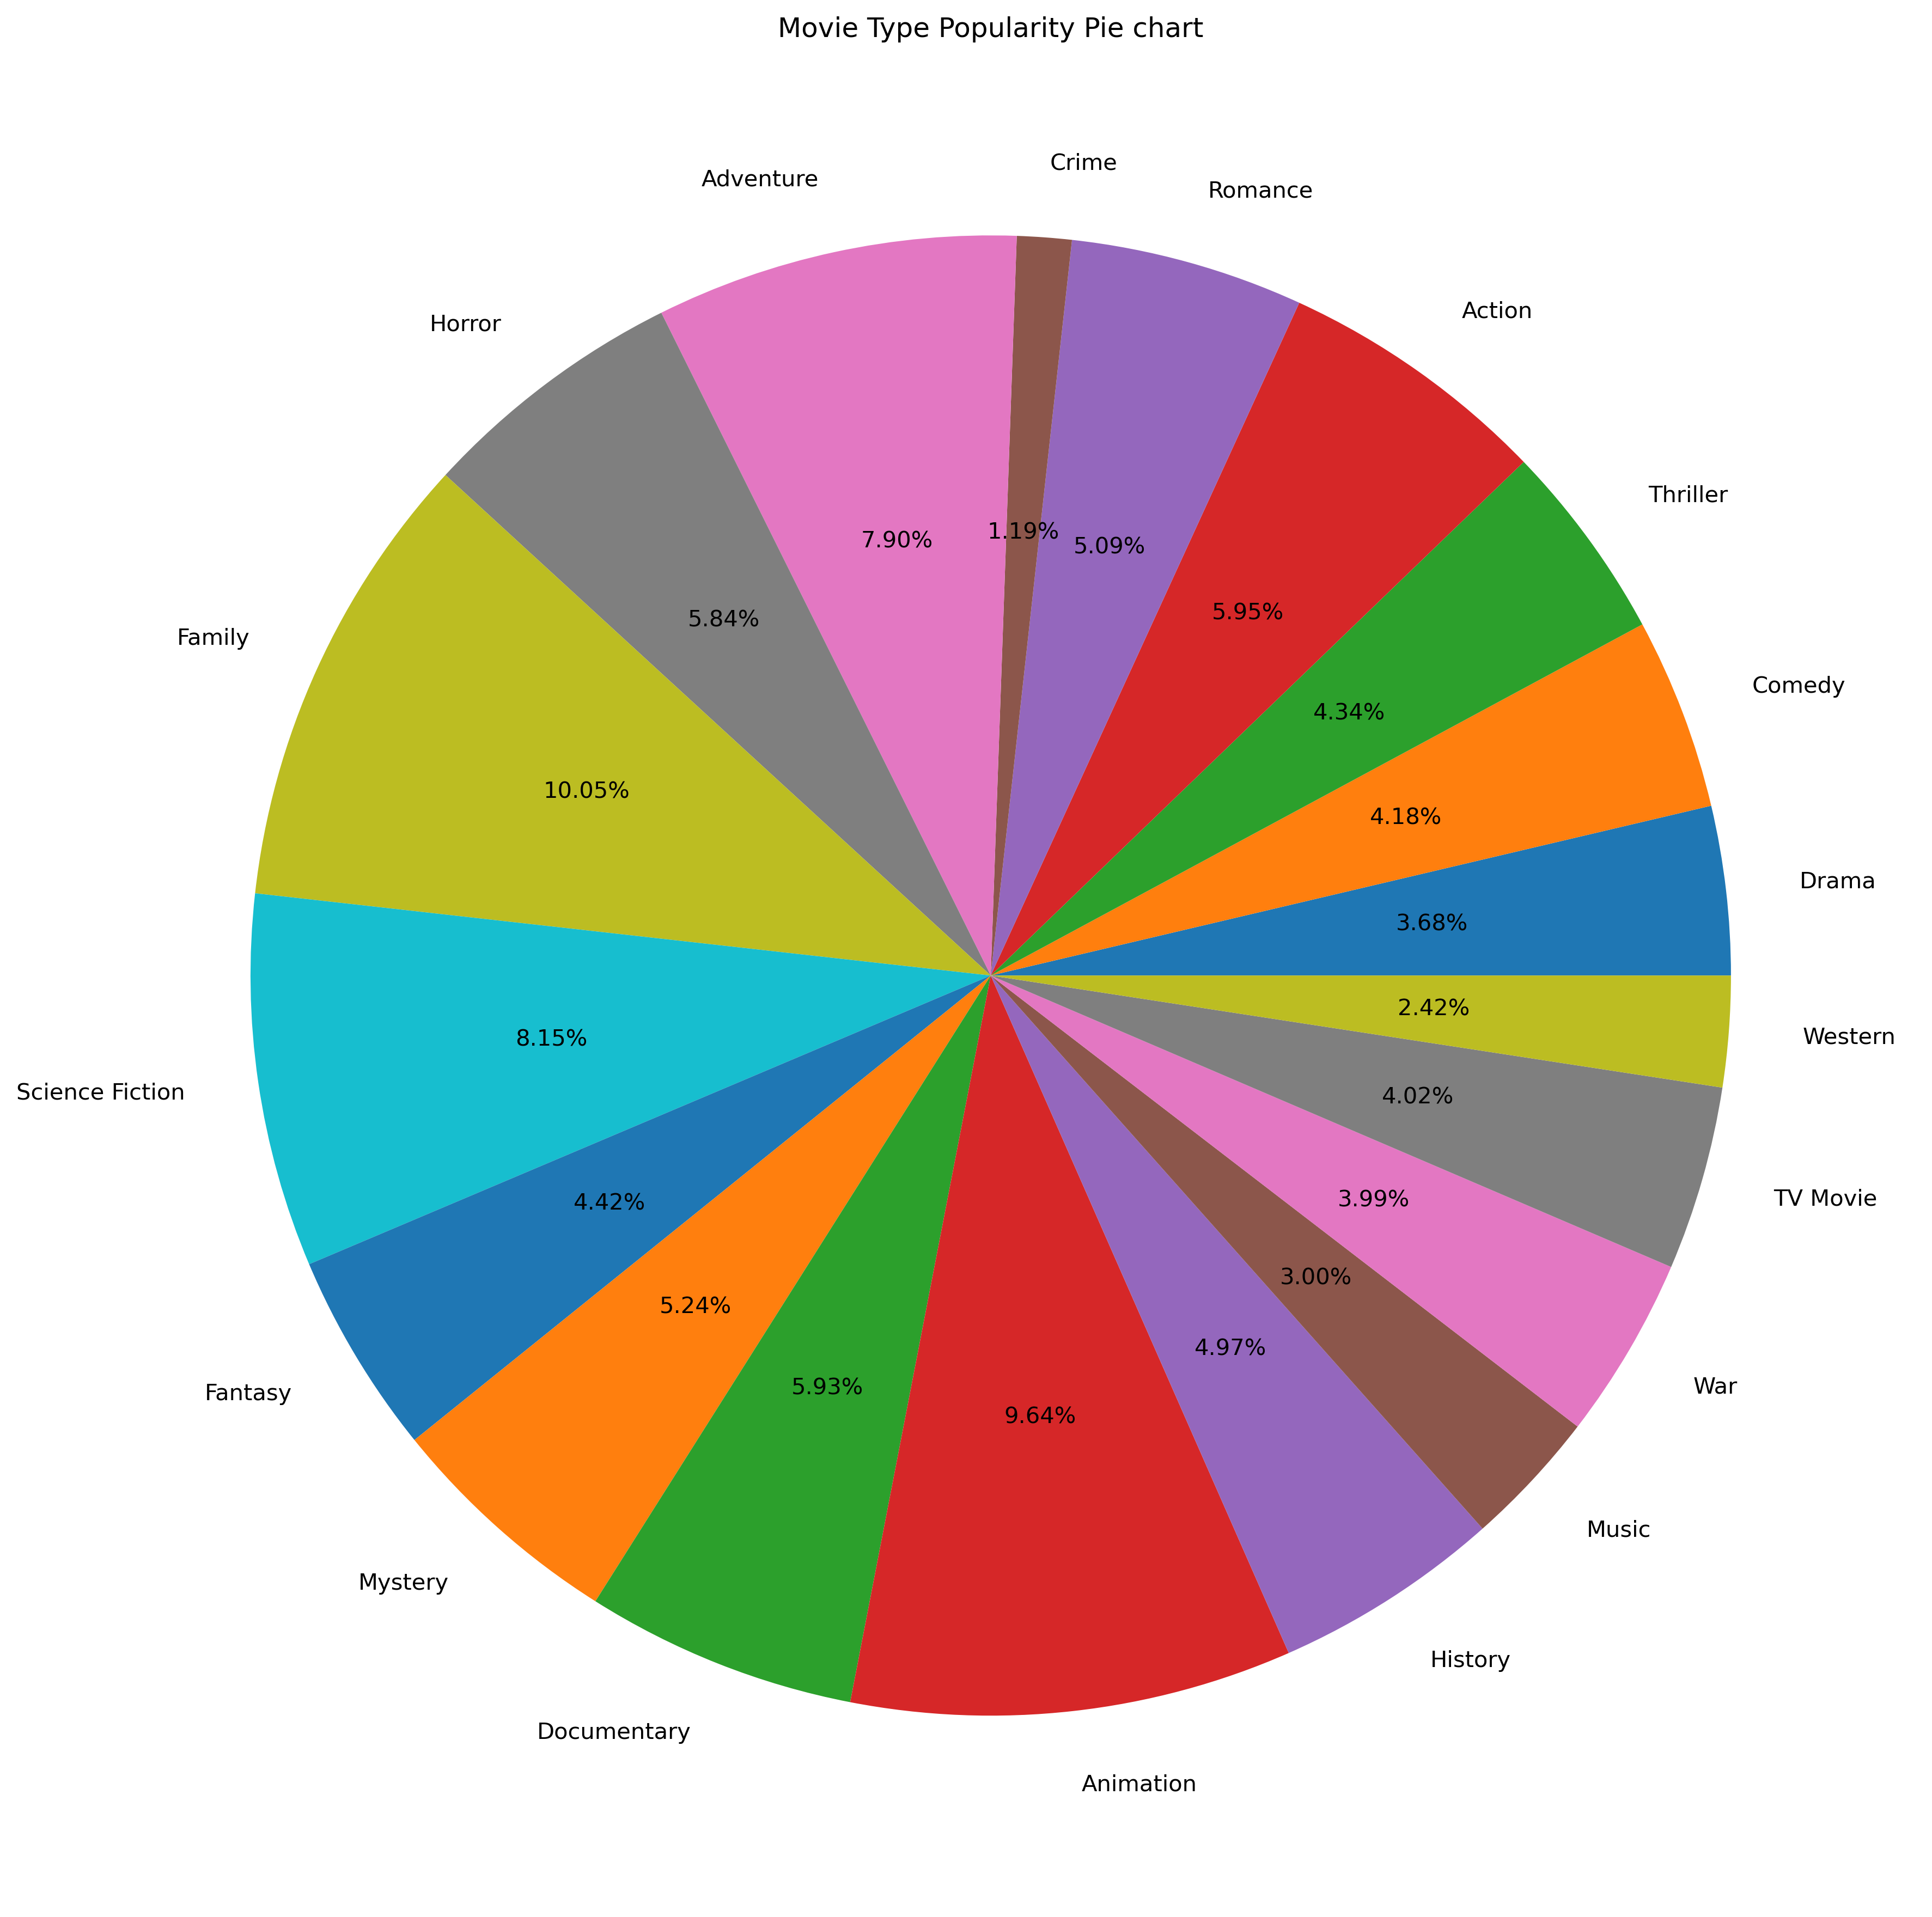

In [12]:
fig = plt.figure(figsize=(15,15))
plt.pie(Popularity,labels=types,autopct='%1.2f%%') 
plt.title("Movie Type Popularity Pie chart")
plt.show()  

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > It is worth noting that previous movies with a high number of genres are not very popular when it comes to popularity. On the contrary, the Family genre boasts the top spot, followed by Science Fiction and Animation. Crime genre films are abundant in number but low in popularity. People prefer family genre movies, which are related to life. Maybe crime genre movies are still not so morally popular.

### <font face="Trebuchet MS" size= 3 color=black >1.3 Runtime of different types of movies

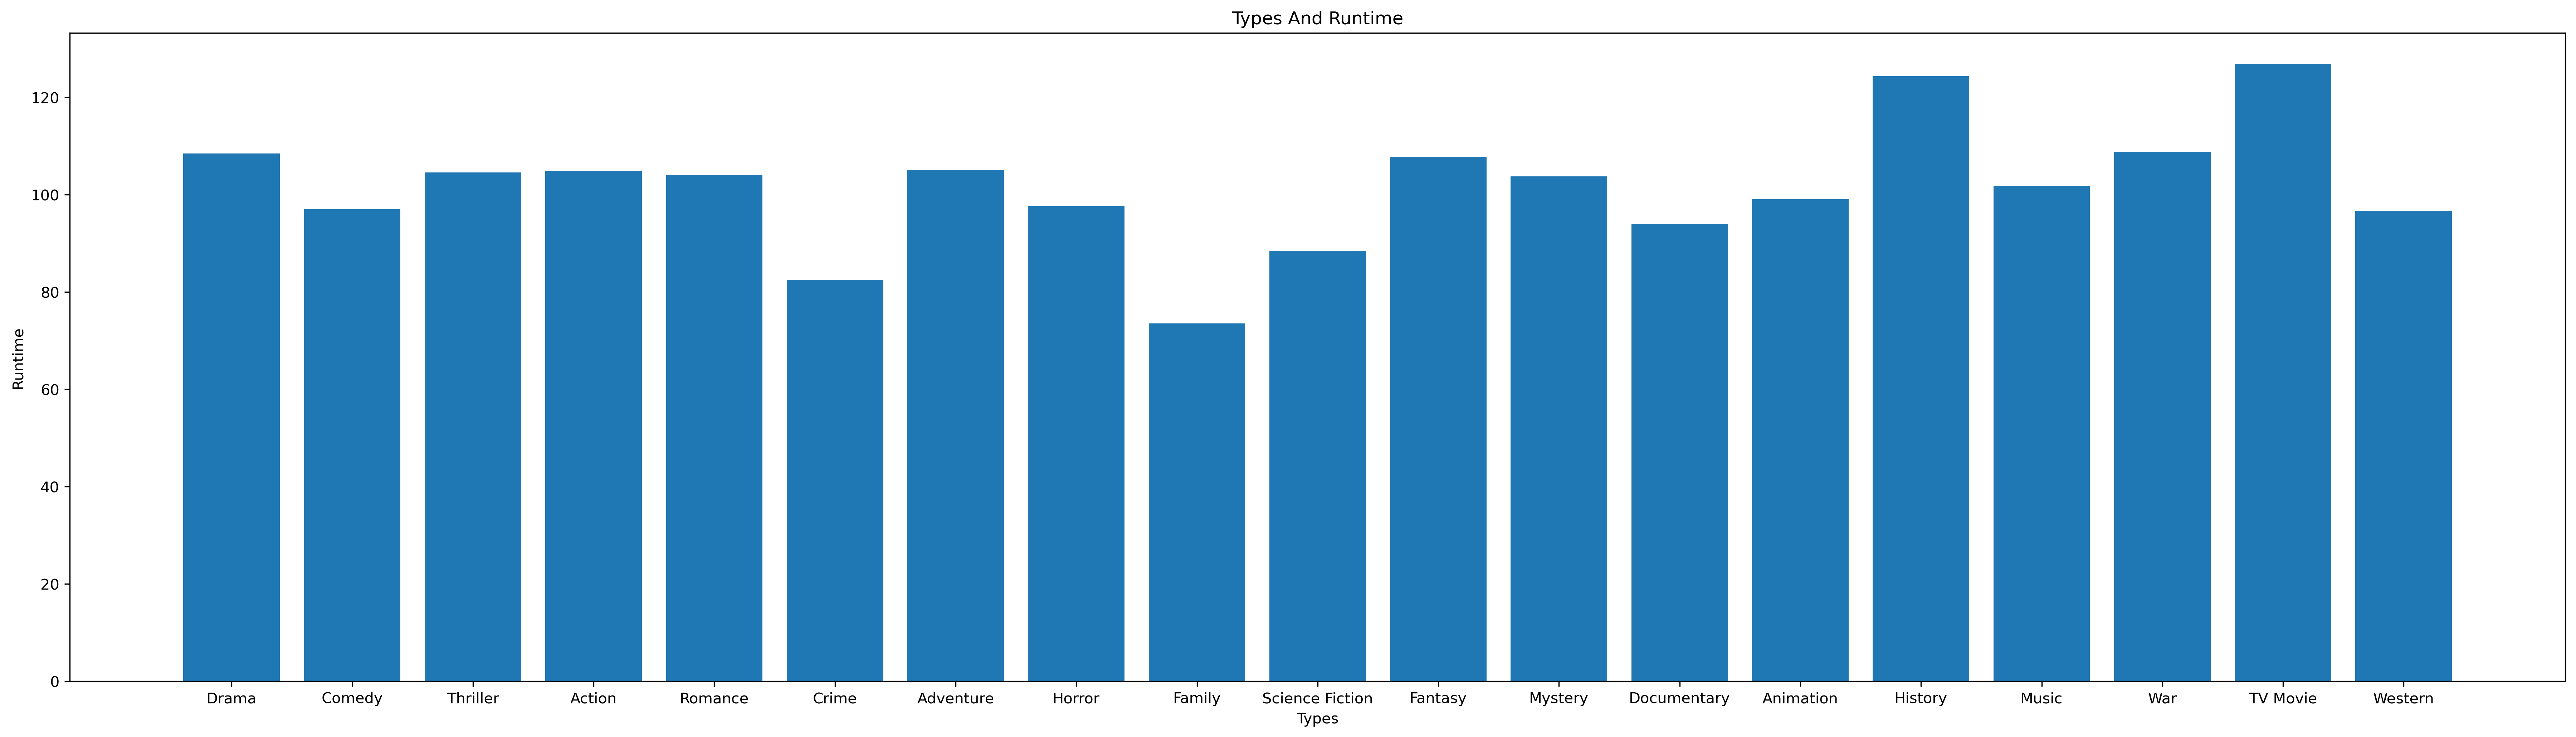

In [14]:

plt.figure(figsize=(30,8))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = types
y = Runtime

plt.bar(x,y)
plt.xlabel('Types')
plt.ylabel('Runtime')
plt.title('Types And Runtime')

plt.show()


&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > The vast majority of the films stay around 100 minutes. History and Tv movies may involve recording more details and reach 120 minutes or more. The shortest length movie is the family genre, less than 80 minutes.

### <font face="Trebuchet MS" size= 3 color=black >1.4 Rating of different types of movies

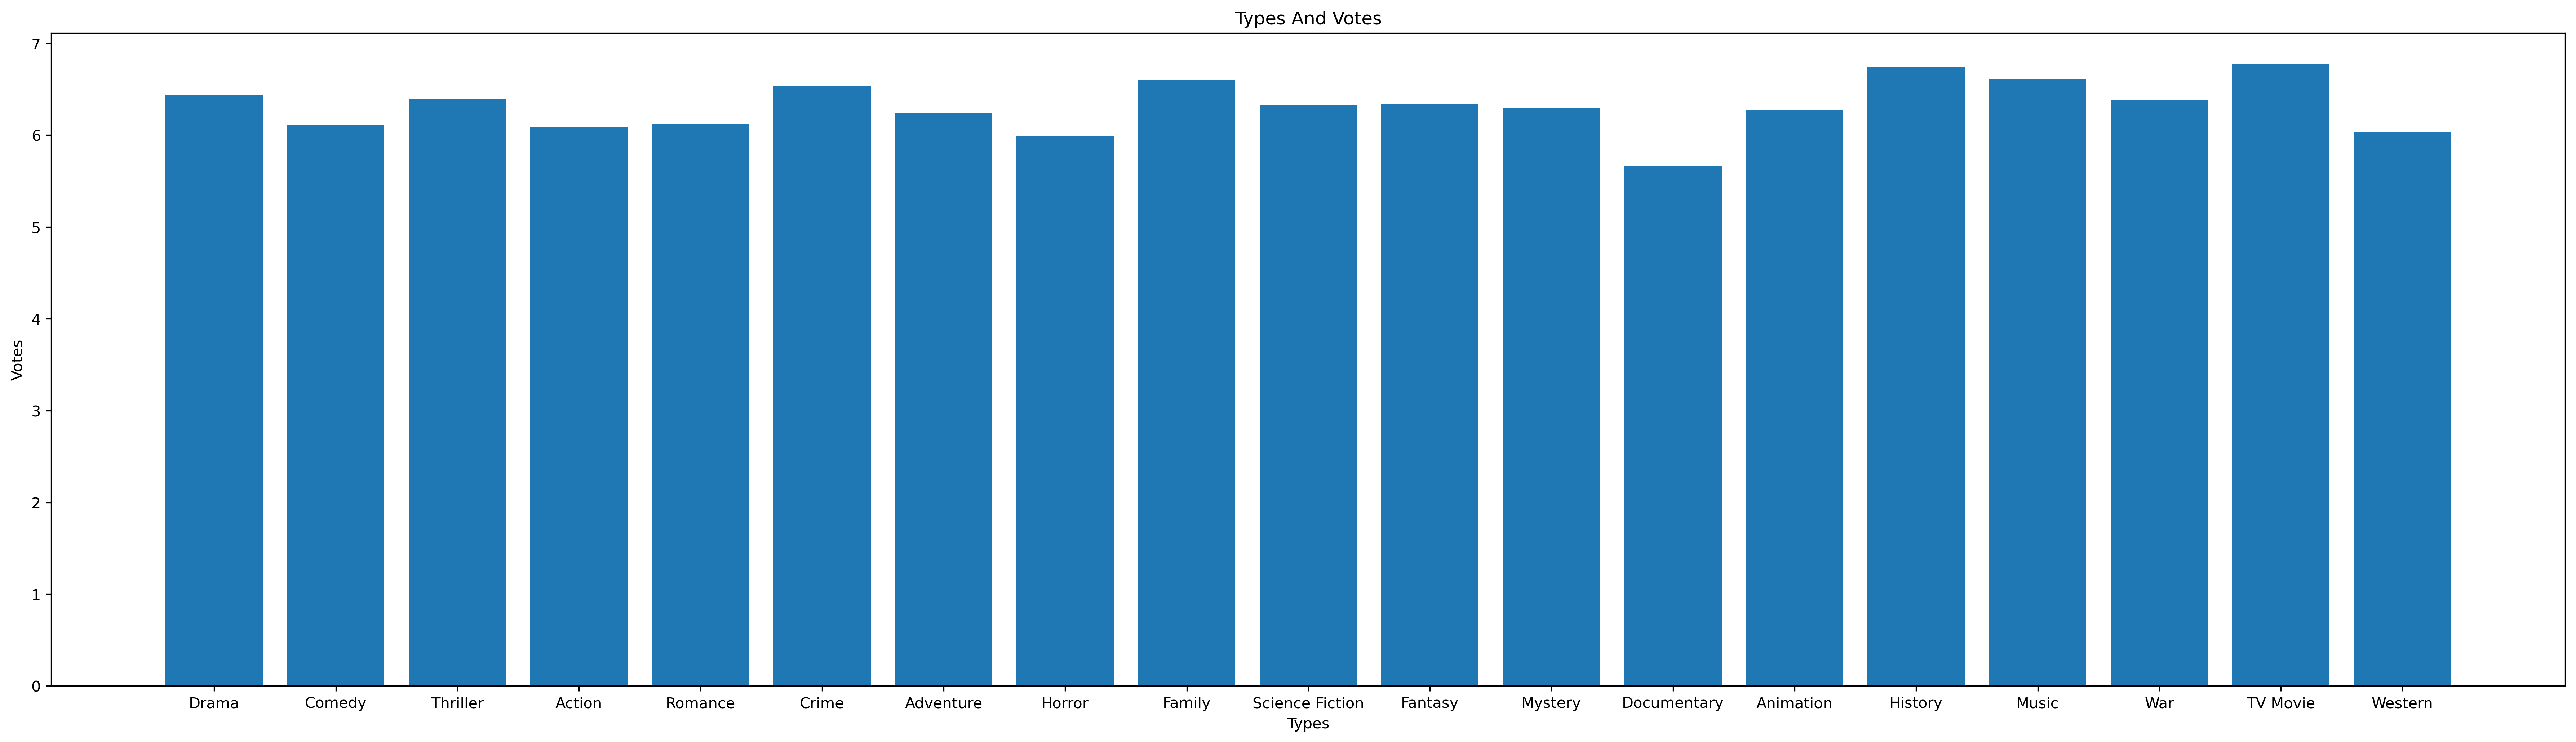

In [15]:

plt.figure(figsize=(30,8))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = types
y = Vote_average

plt.bar(x,y)
plt.xlabel('Types')
plt.ylabel('Votes')
plt.title('Types And Votes')

plt.show()


&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Overall, most of the genre movies are rated around 6. The Documentary genre is slightly below the others.

### <font face="Trebuchet MS" size= 3 color=black >2.1 Annual movie production

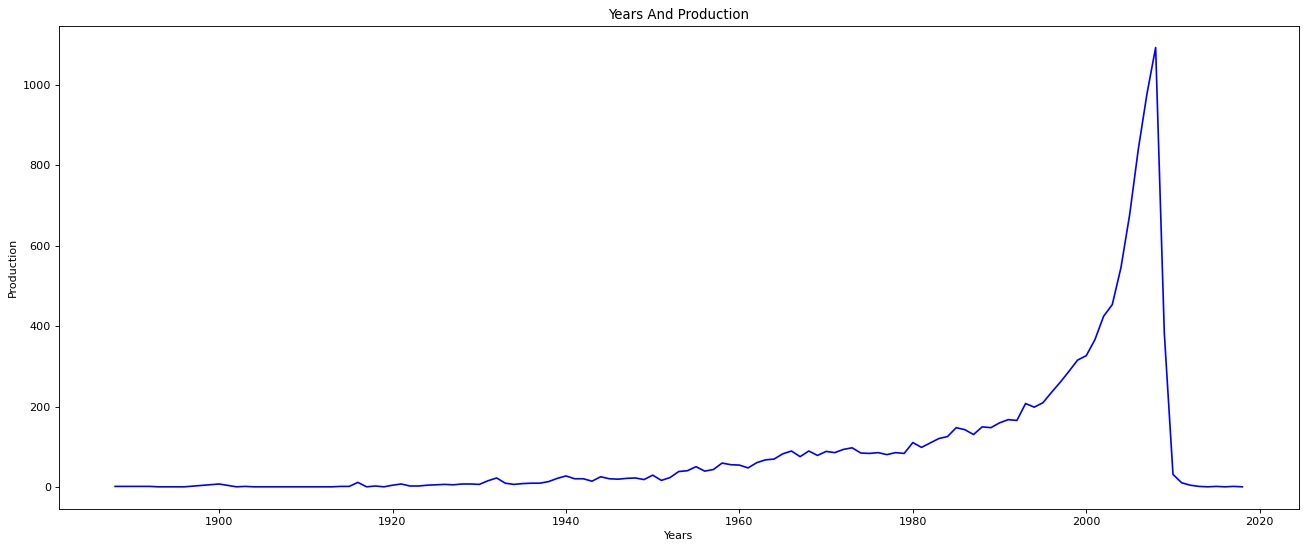

In [16]:
movie_production = data.groupby('release_date')['original_language'].count()

plt.figure(figsize=(20,8),dpi=80)
x = movie_production.index.tolist()
y = movie_production

plt.plot(x,y,color= 'b')
plt.xlabel('Years')
plt.ylabel('Production')
plt.title('Years And Production')

plt.show()

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black >The thematic part of the data is information on 20th-century cinema. Therefore, from 1900 to around 2000, the growth curve of the number of films over time can be seen. The more it goes to 2000, the more exponential growth is observed. Due to the lack of data afterward, the changes between 2000 and 2010 and beyond cannot be shown in the picture. However, according to experience, the number of movies in the 21st century will be higher.

### <font face="Trebuchet MS" size= 3 color=black >2.2 Movie production in different regions

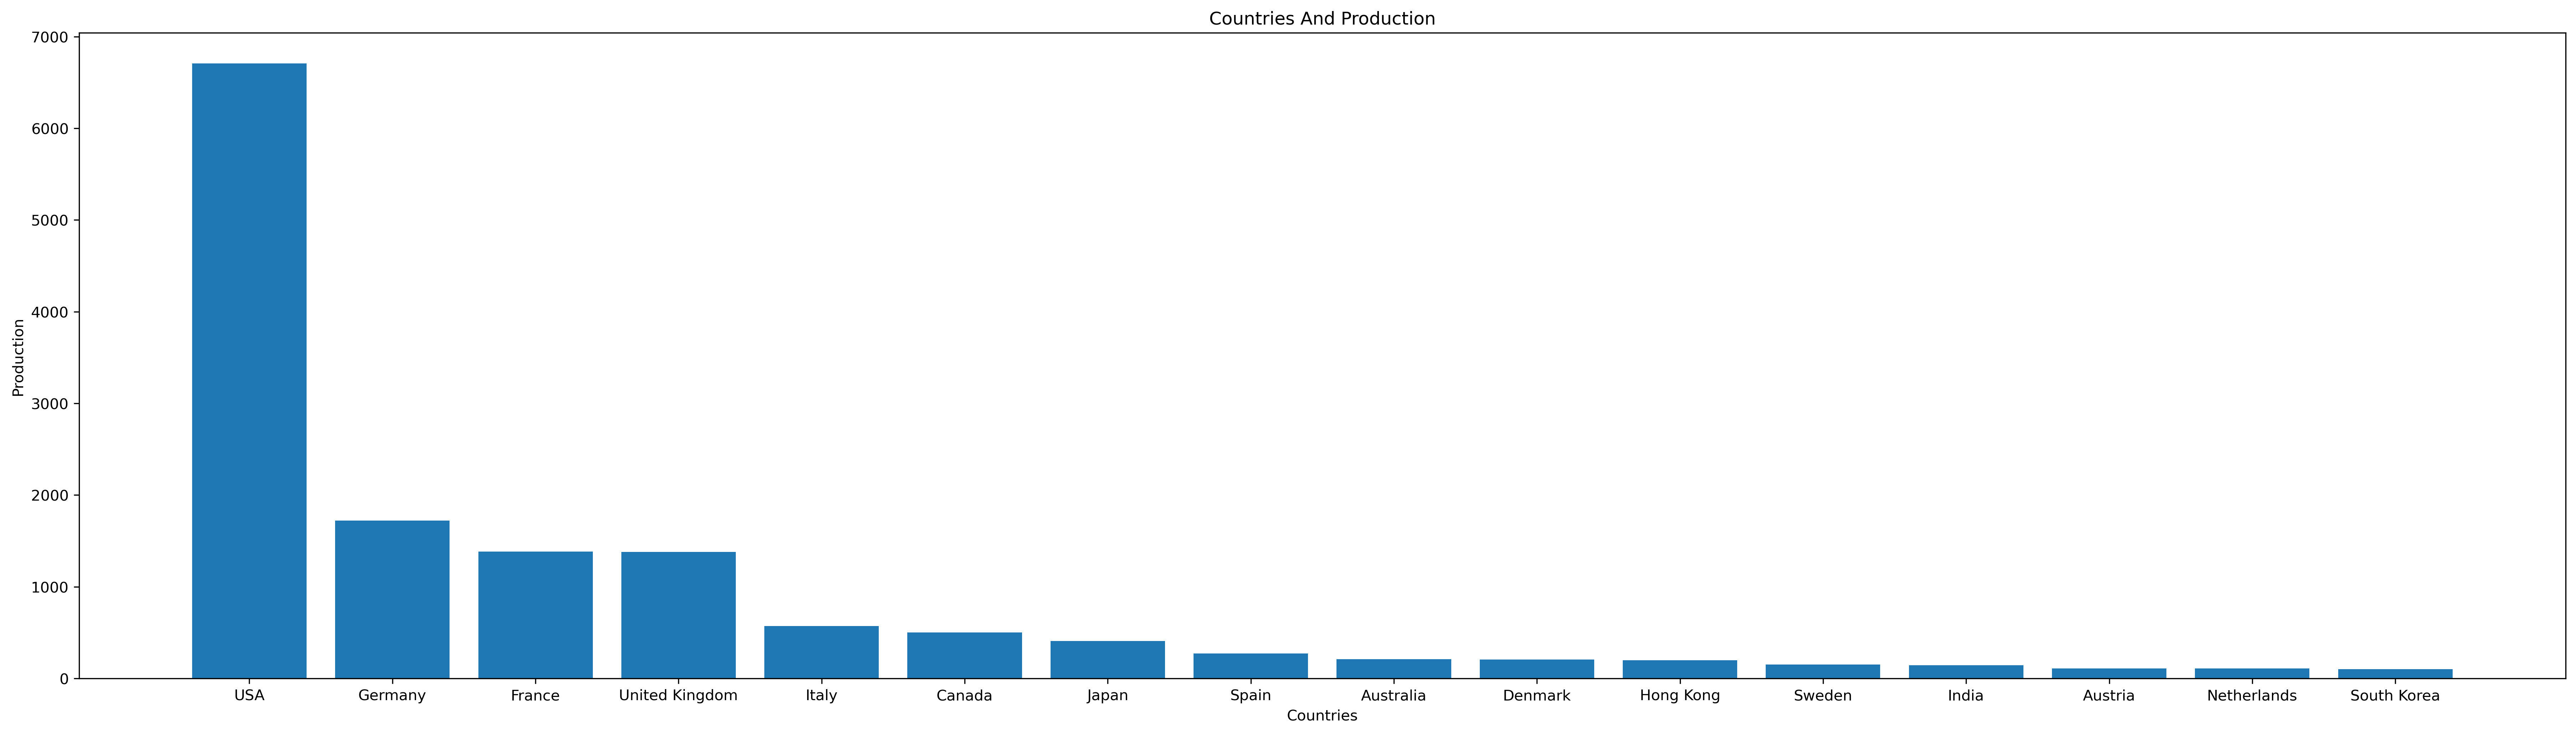

In [17]:

movie_countries = data['production_countries'].str.split(',')
movie_countries = movie_countries.apply(pd.Series)
movie_countries = movie_countries.apply(pd.value_counts)
movie_countries = movie_countries.unstack().dropna().reset_index()

movie_countries.columns =['level_0','type','counts']
movie_countries_m = movie_countries.drop(['level_0'],axis=1).groupby('type').sum().sort_values(by=['counts'],ascending=False).reset_index()

counts2 = [i for i in movie_countries_m.counts if i > 100]
counts2 = counts2[1:]

types2 = [i for i in movie_countries_m.type]
types2 = types2[1:len(counts2)+1]
types2[0] = 'USA'




plt.figure(figsize=(30,8))
x = types2
y = counts2
plt.bar(x,y)
plt.xlabel('Countries')
plt.ylabel('Production')
plt.title('Countries And Production')
plt.show()

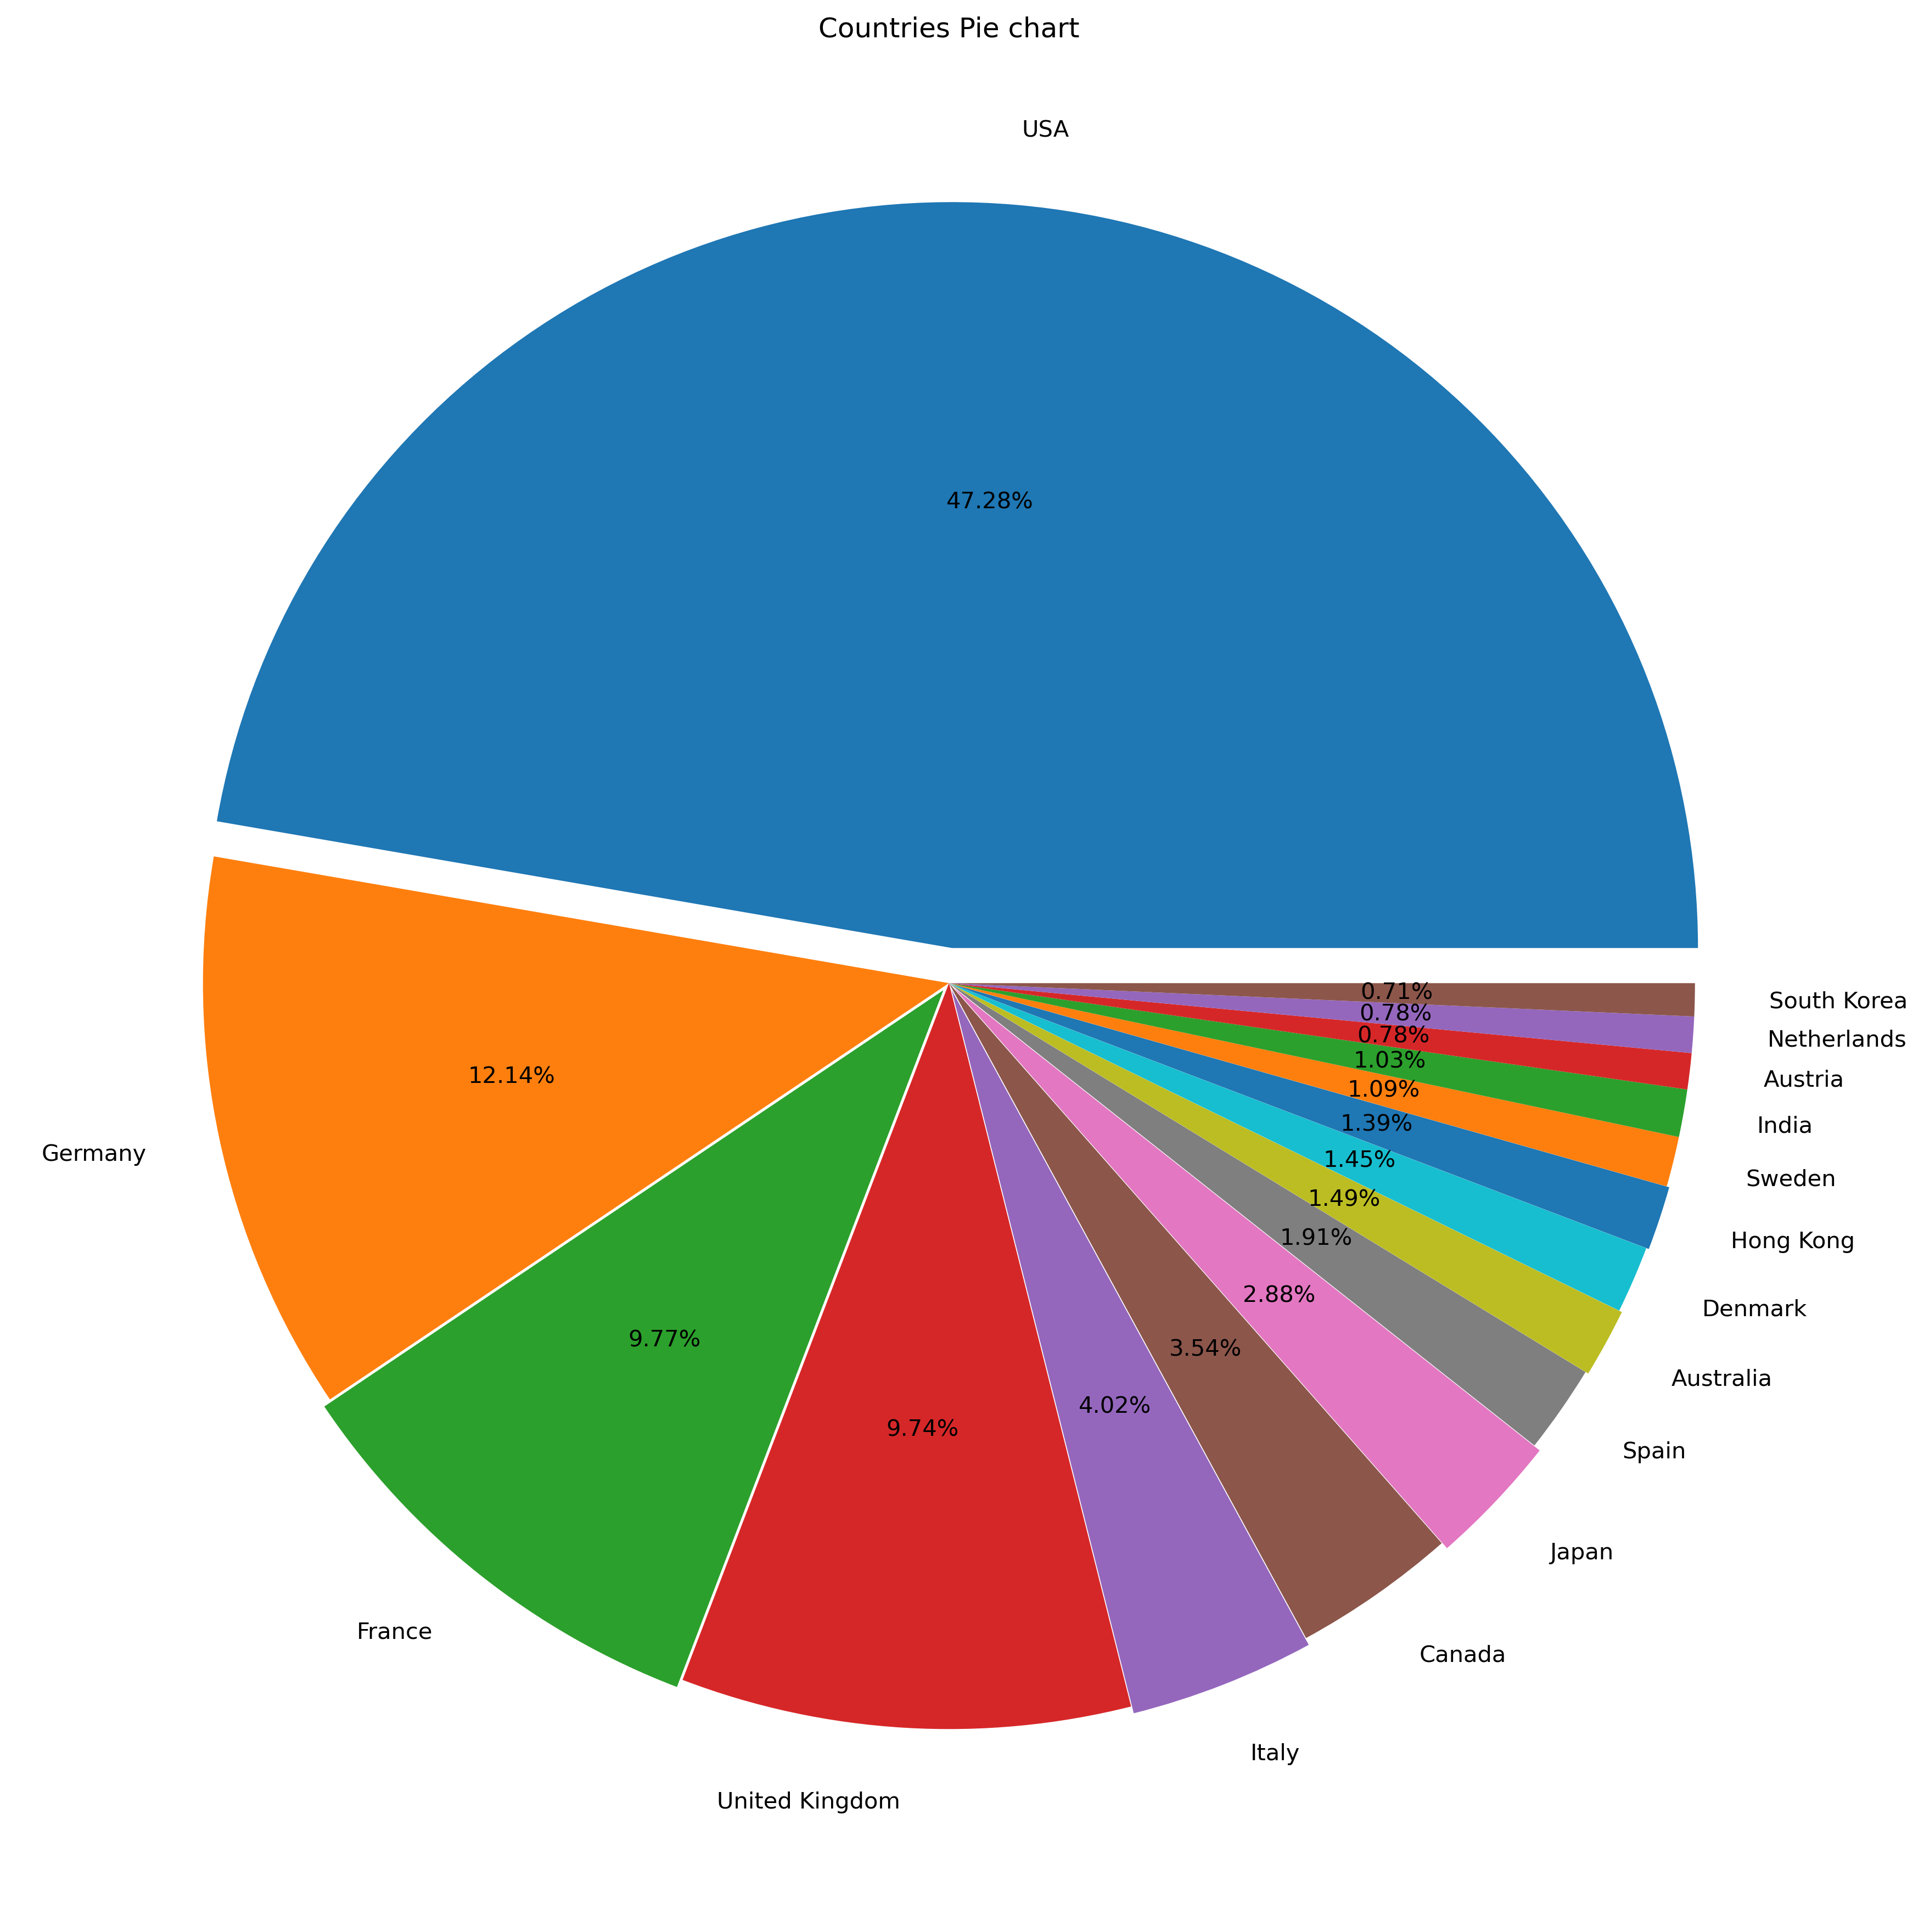

In [18]:
fig = plt.figure(figsize=(15,15))
explode = []
for i in y:
    if ((i/(sum(y))>0.03)):
        explode.append((i/(sum(y)*10)))
    explode.append(0)
explode=explode[0:len(y)]

plt.pie(y,labels=x,autopct='%1.2f%%',explode = explode) 
plt.title("Countries Pie chart")
plt.show()  


&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > As can be seen from the chart, the United States is the top movie producer, accounting for 47.28% of the total number of movies (which should also be related to the data included on the website). Germany, France, and UK follow this.

### <font face="Trebuchet MS" size= 3 color=black >2.3 Number of movies in different languages

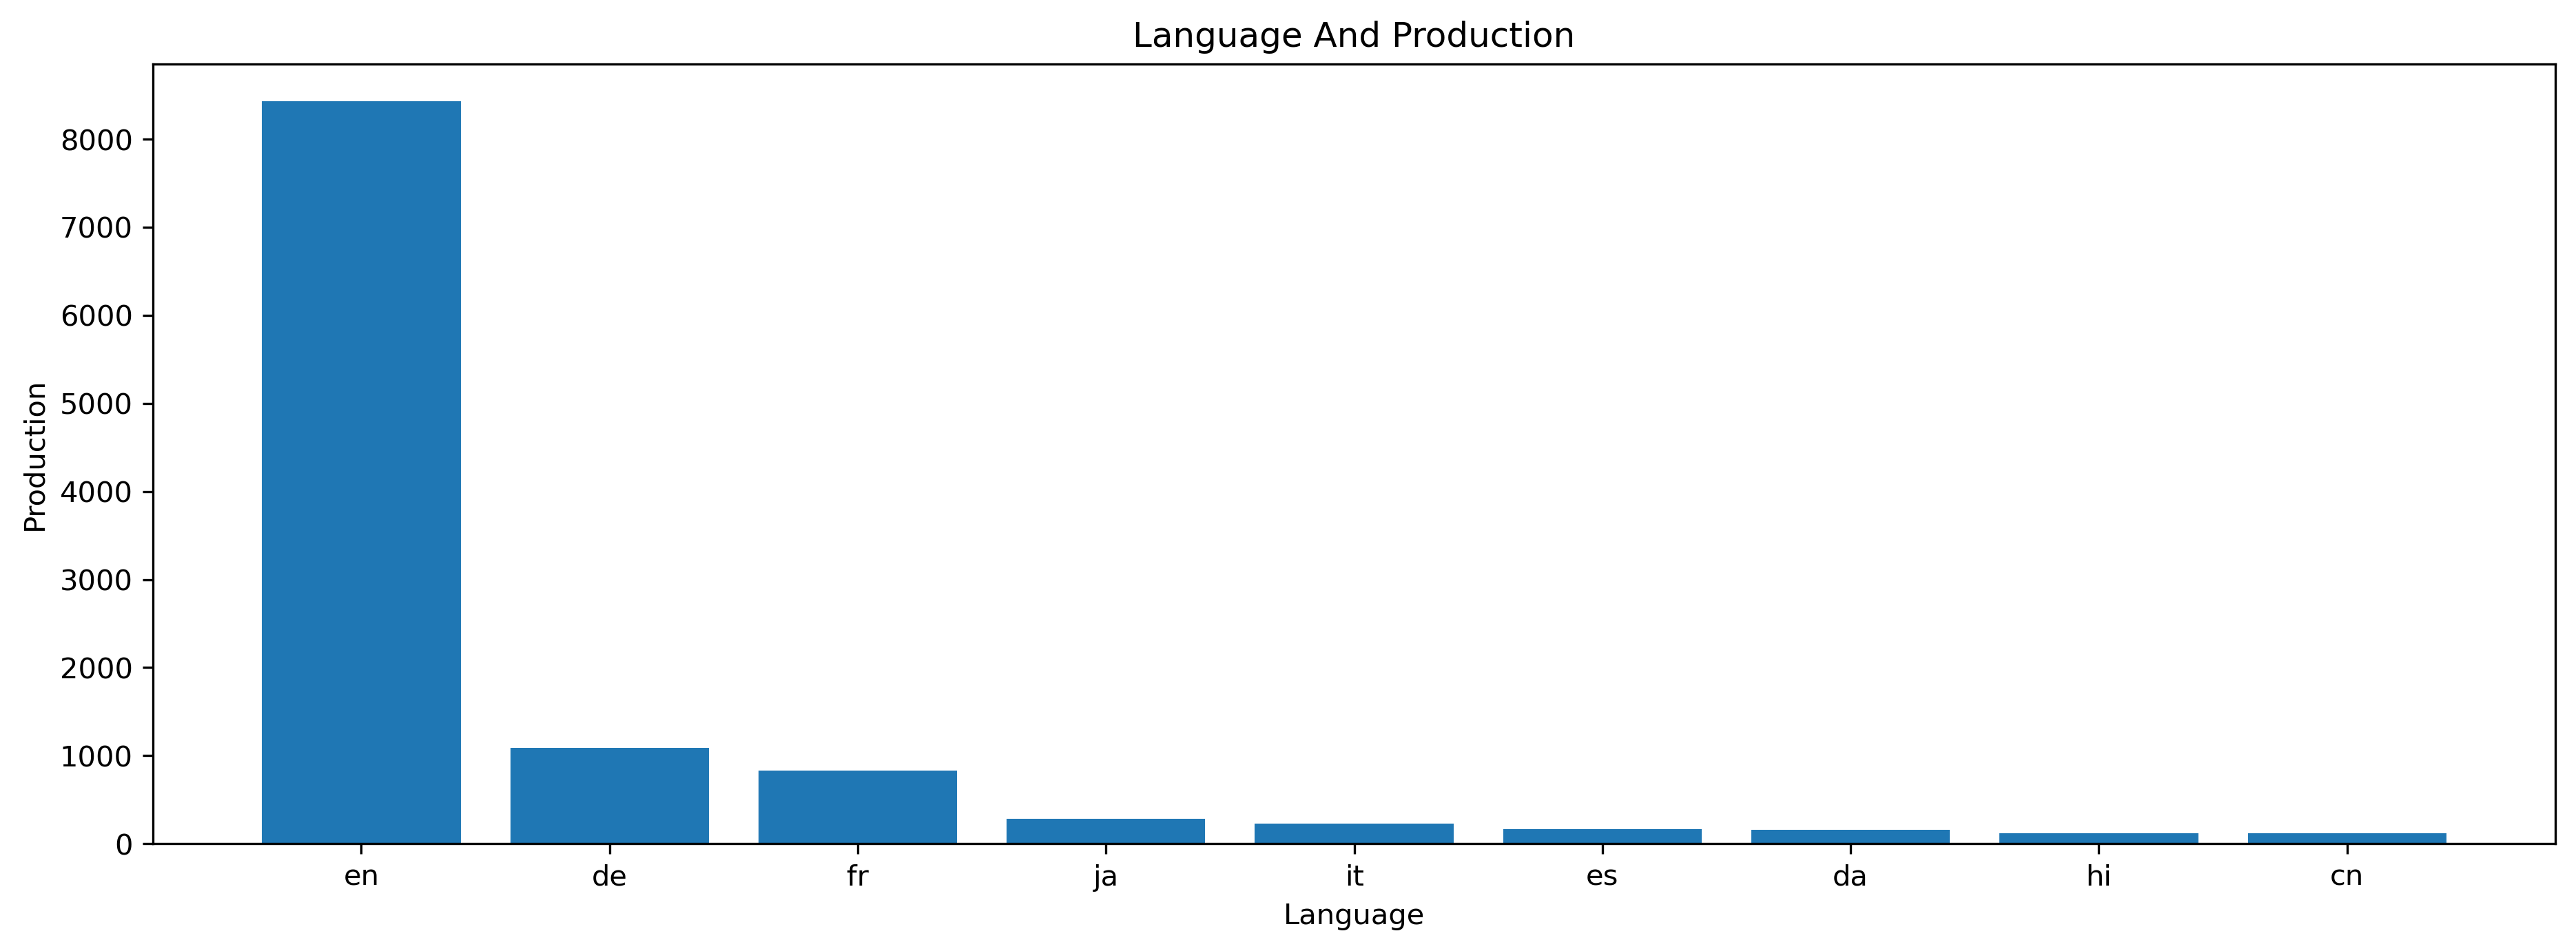

In [19]:

movie_language = data['original_language'].str.split()


movie_language = movie_language.apply(pd.Series)

movie_language = movie_language.apply(pd.value_counts)

movie_language = movie_language.unstack().dropna().reset_index()


movie_language.columns =['level_0','type','counts']
movie_language_m = movie_language.drop(['level_0'],axis=1).groupby('type').sum().sort_values(by=['counts'],ascending=False).reset_index()


counts3 = [i for i in movie_language_m.counts if i > 100]


types3 = [i for i in movie_language_m.type]
types3 = types3[0:len(counts3)]


plt.figure(figsize=(15,5))
x = types3
y = counts3
plt.bar(x,y)

plt.xlabel('Language')
plt.ylabel('Production')
plt.title('Language And Production')
plt.show()

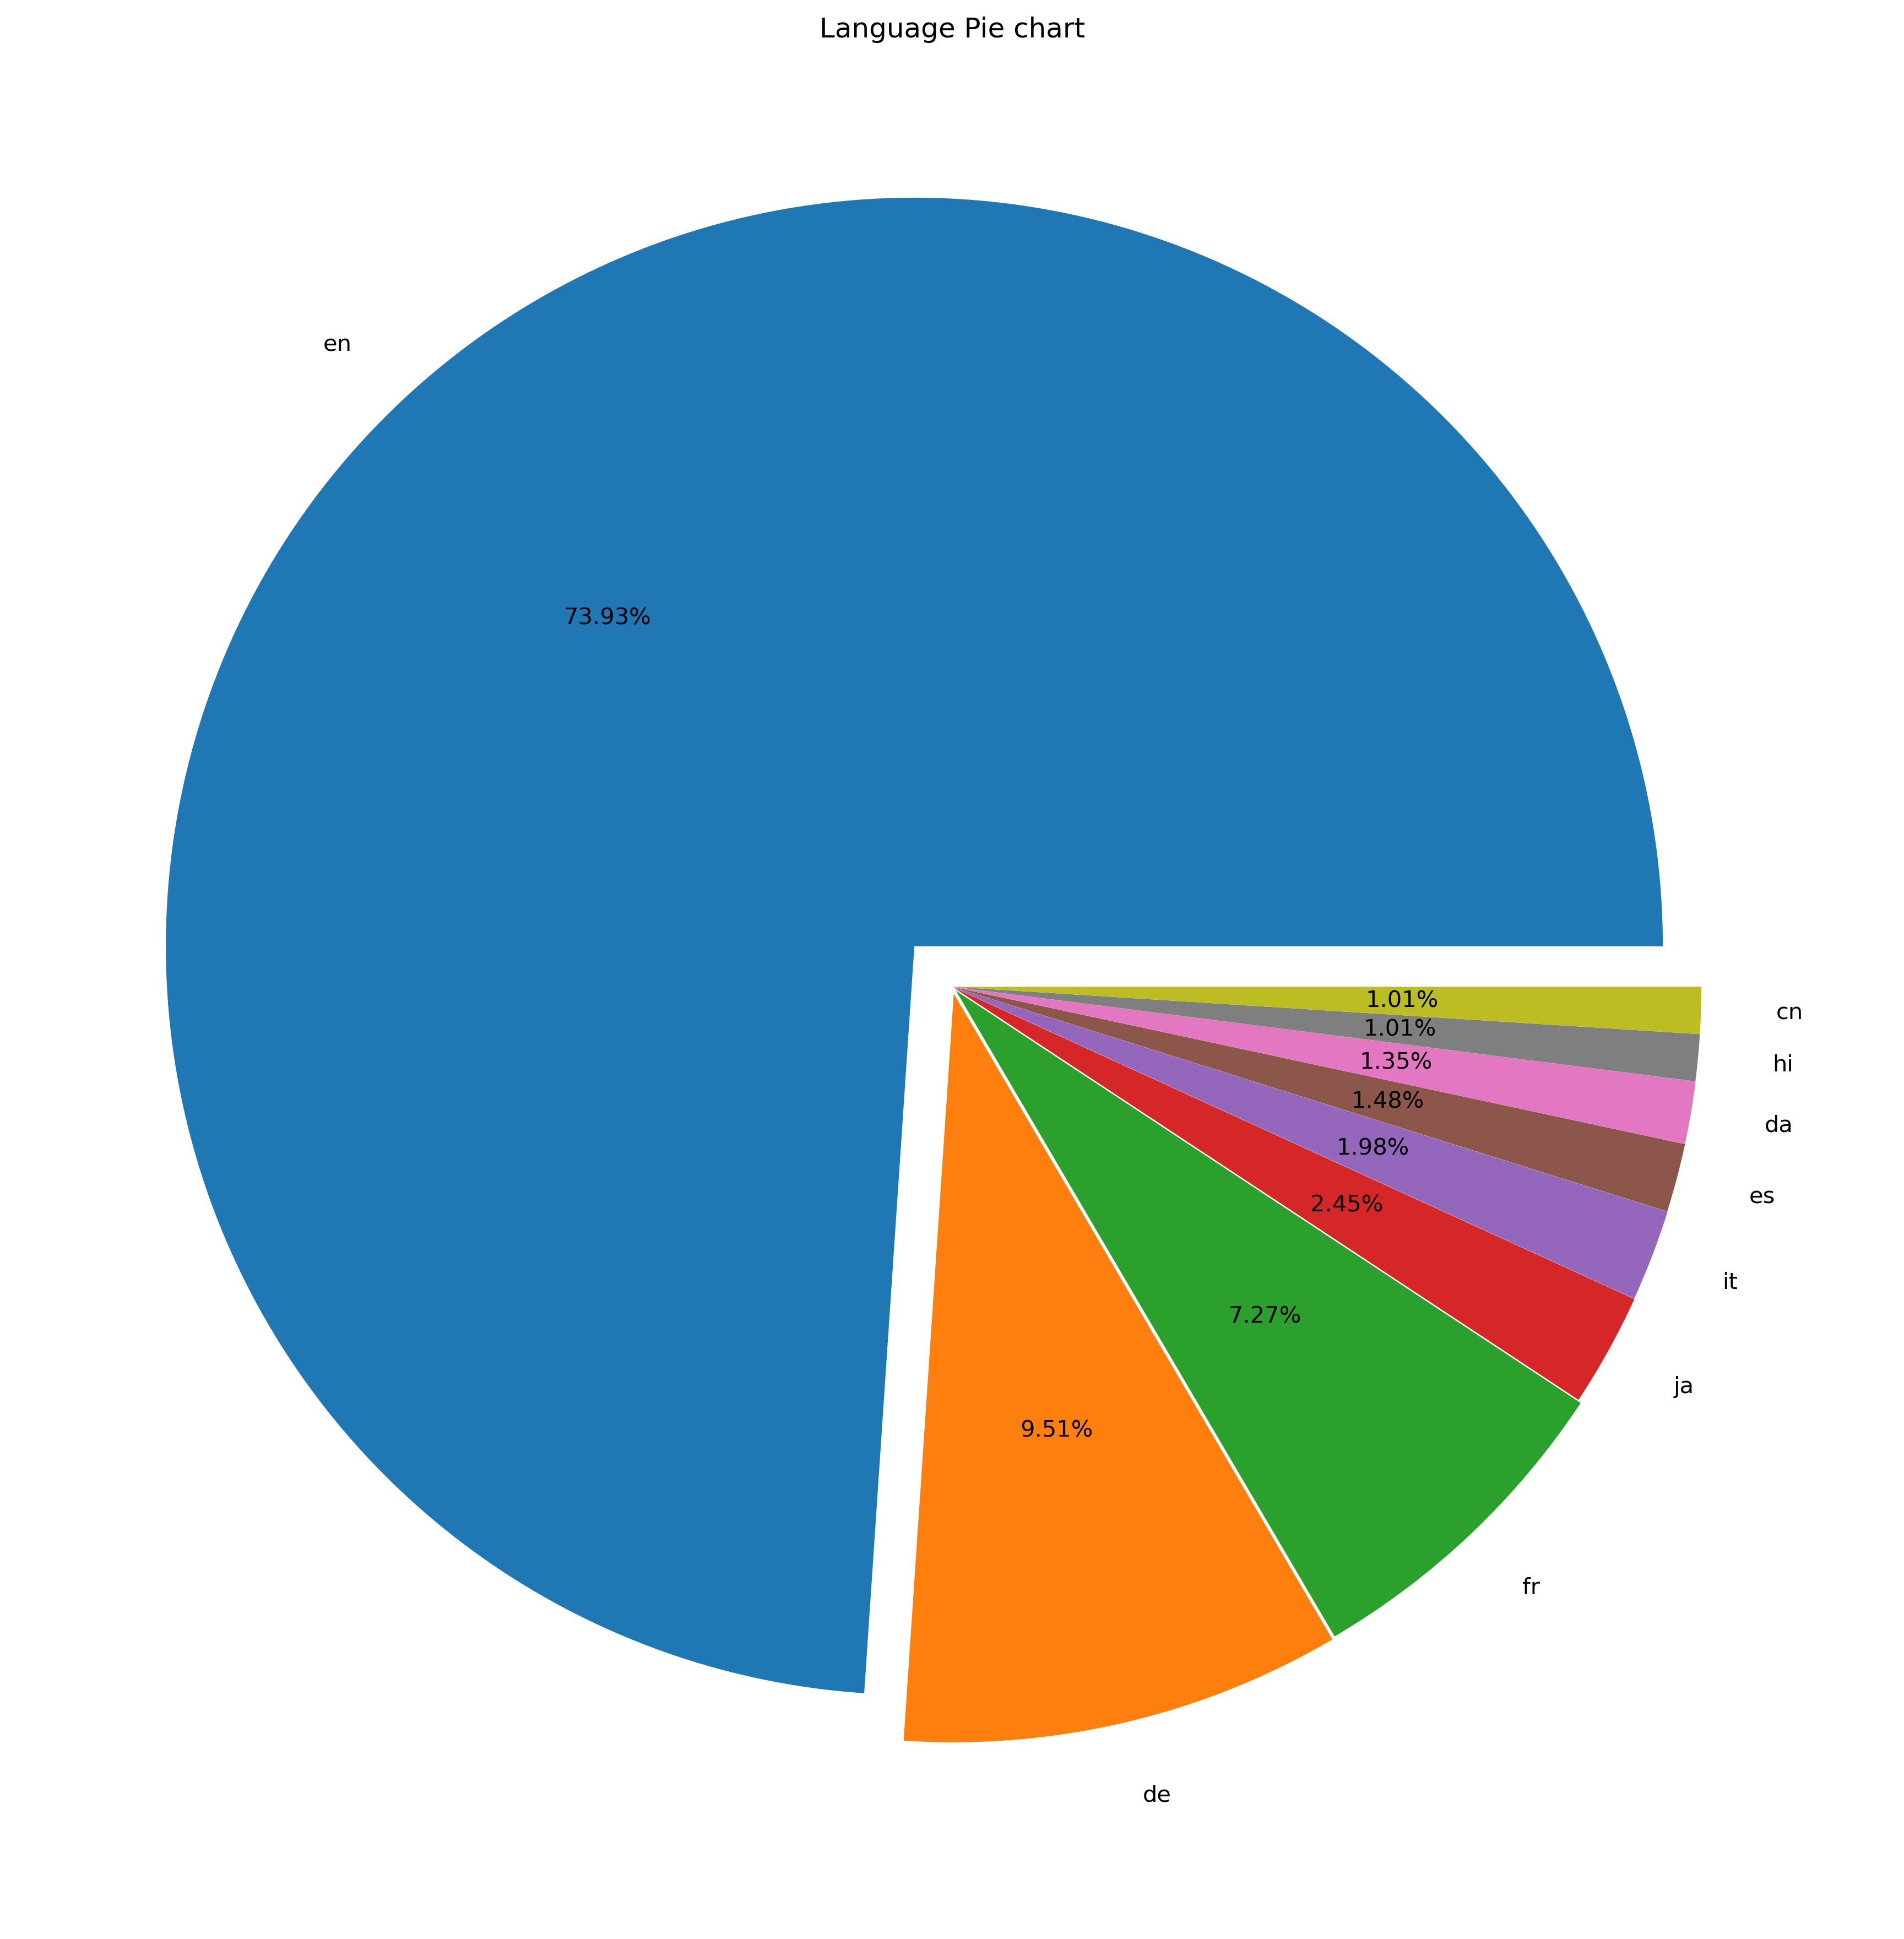

In [20]:
fig = plt.figure(figsize=(15,15))
explode = [(i/(sum(y)*10)) for i in y ]
plt.pie(y,labels=x,autopct='%1.2f%%',explode = explode) 
plt.title("Language Pie chart")
plt.show()  

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Since the U.S. is a major film-producing country, there is no doubt that the number of films in the English language genre will be the highest, at 73.93 percent, followed by German and French.

### <font face="Trebuchet MS" size= 3 color=black > 3.1 Distribution of movie runtime

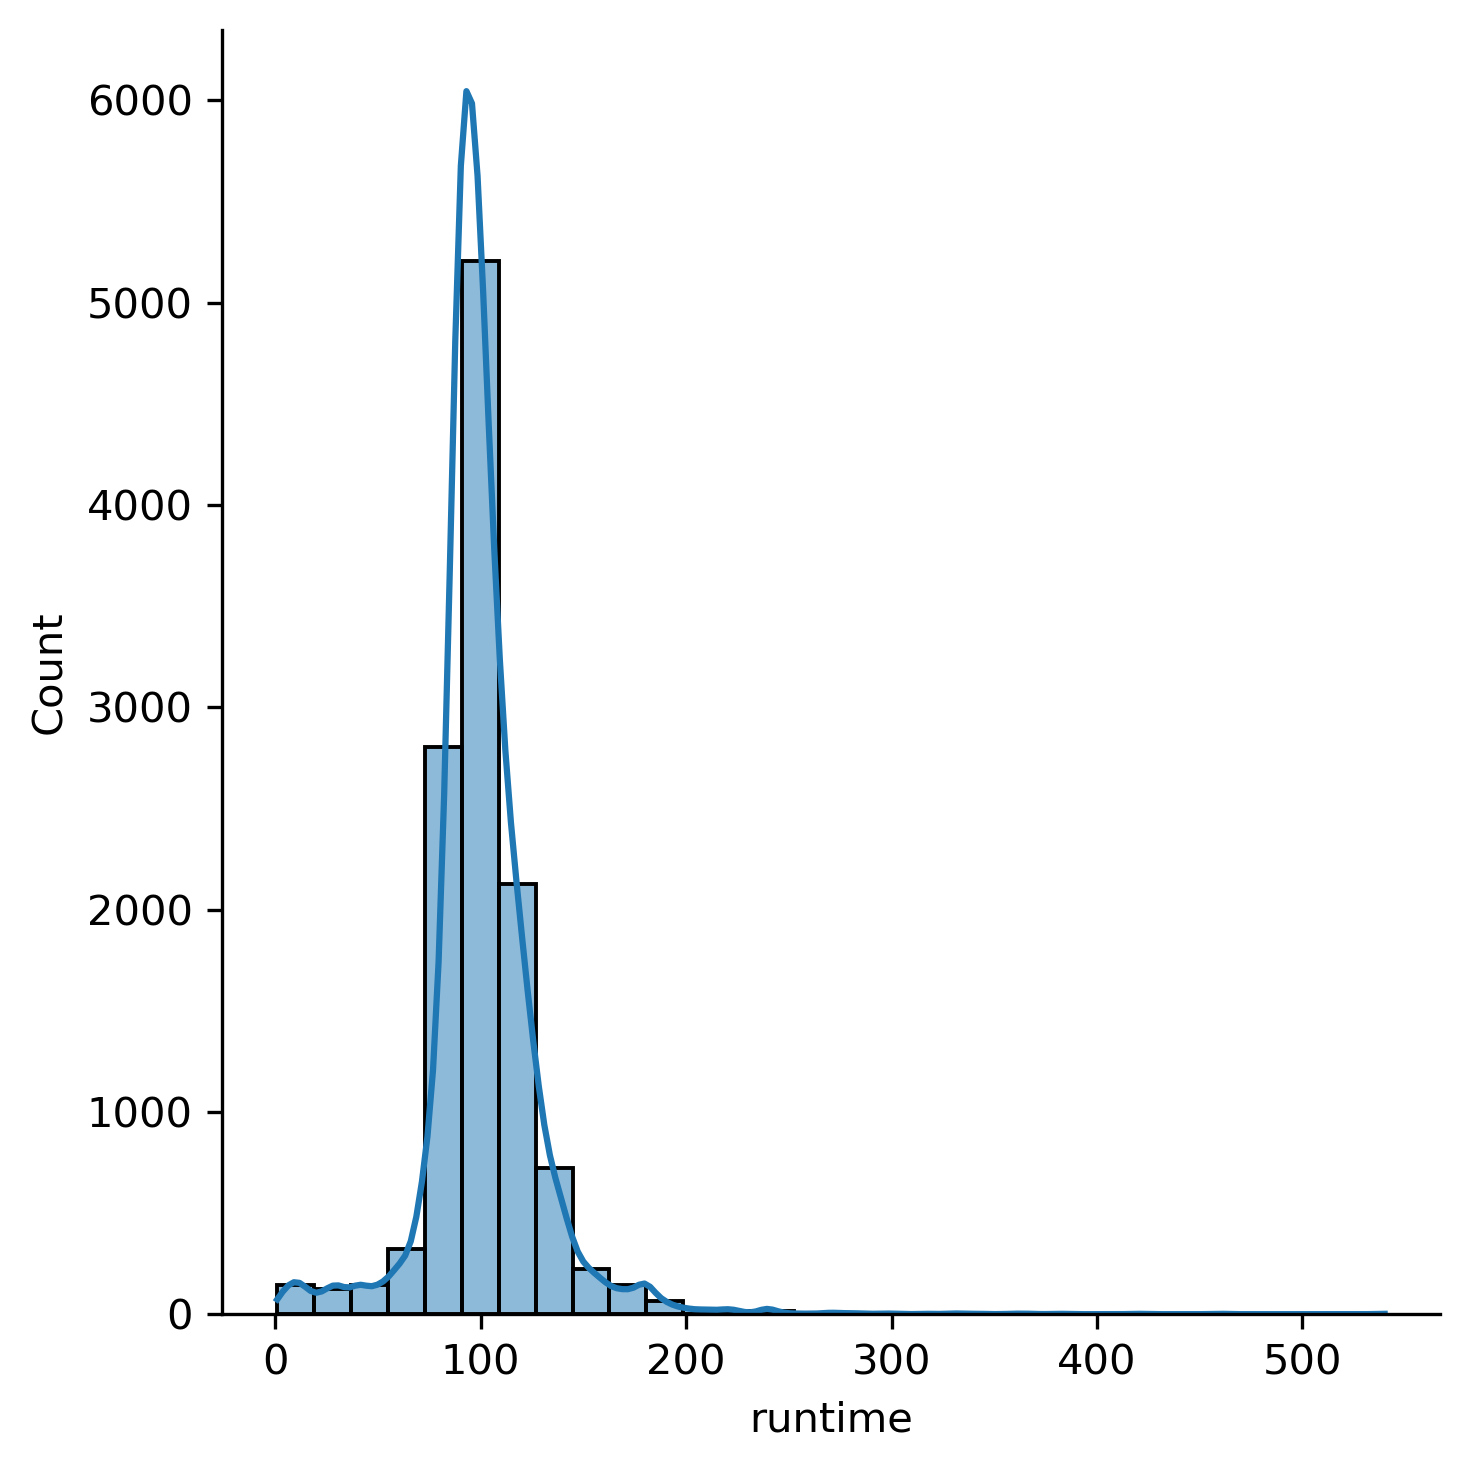

In [21]:
sns.displot(data['runtime'],bins=30,kde=True)
plt.show()

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Most of the movies are around 100 minutes long. It shows a stepwise decrease towards the two poles.

### <font face="Trebuchet MS" size= 3 color=black >3.2 Relationship between runtime and popularity

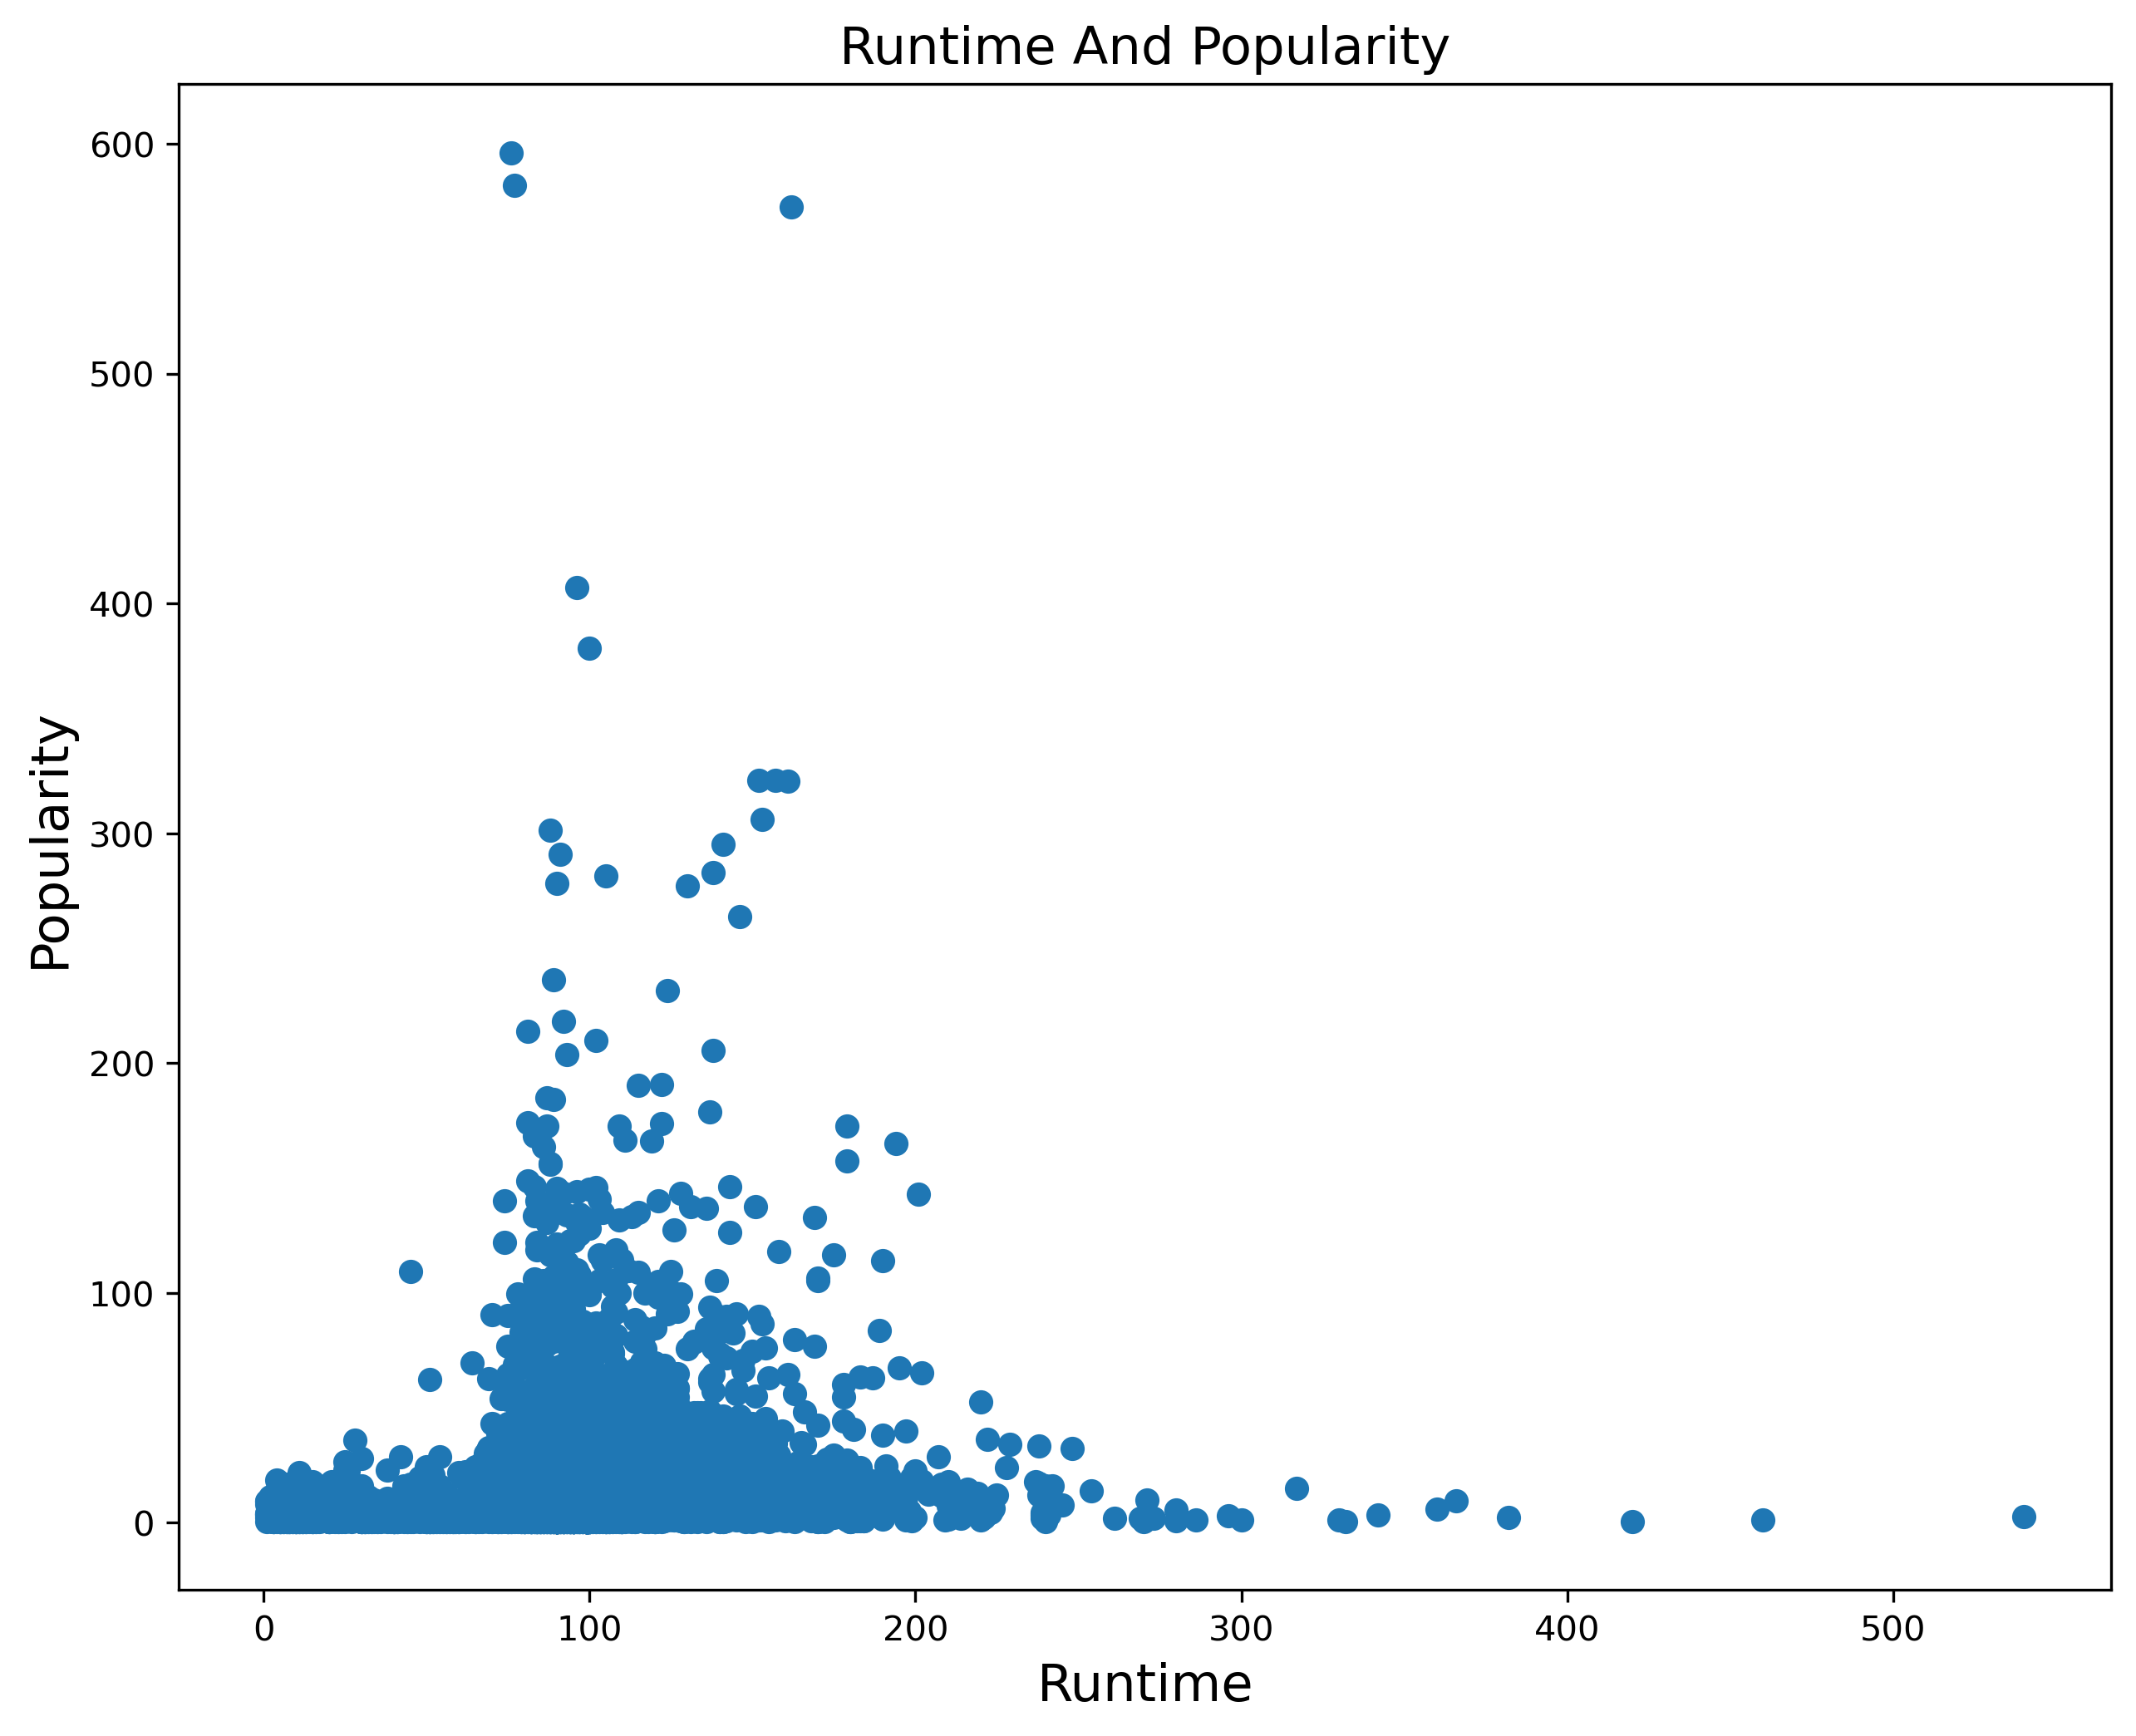

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(data['runtime'],data['popularity'])
plt.title('Runtime And Popularity',fontsize=15)
plt.xlabel('Runtime',fontsize=15)
plt.ylabel('Popularity',fontsize=15)
plt.show()

&emsp; &emsp;<font face="Trebuchet MS" size= 2 color=black > The vast majority of popular movies are around 100 minutes in length and between 100 and 200 minutes. The highest values appear in this interval.The longer the duration the movie and the shorter the duration of the movie are not as popular.

### <font face="Trebuchet MS" size= 3 color=black >4.1 Distribution of movie ratings

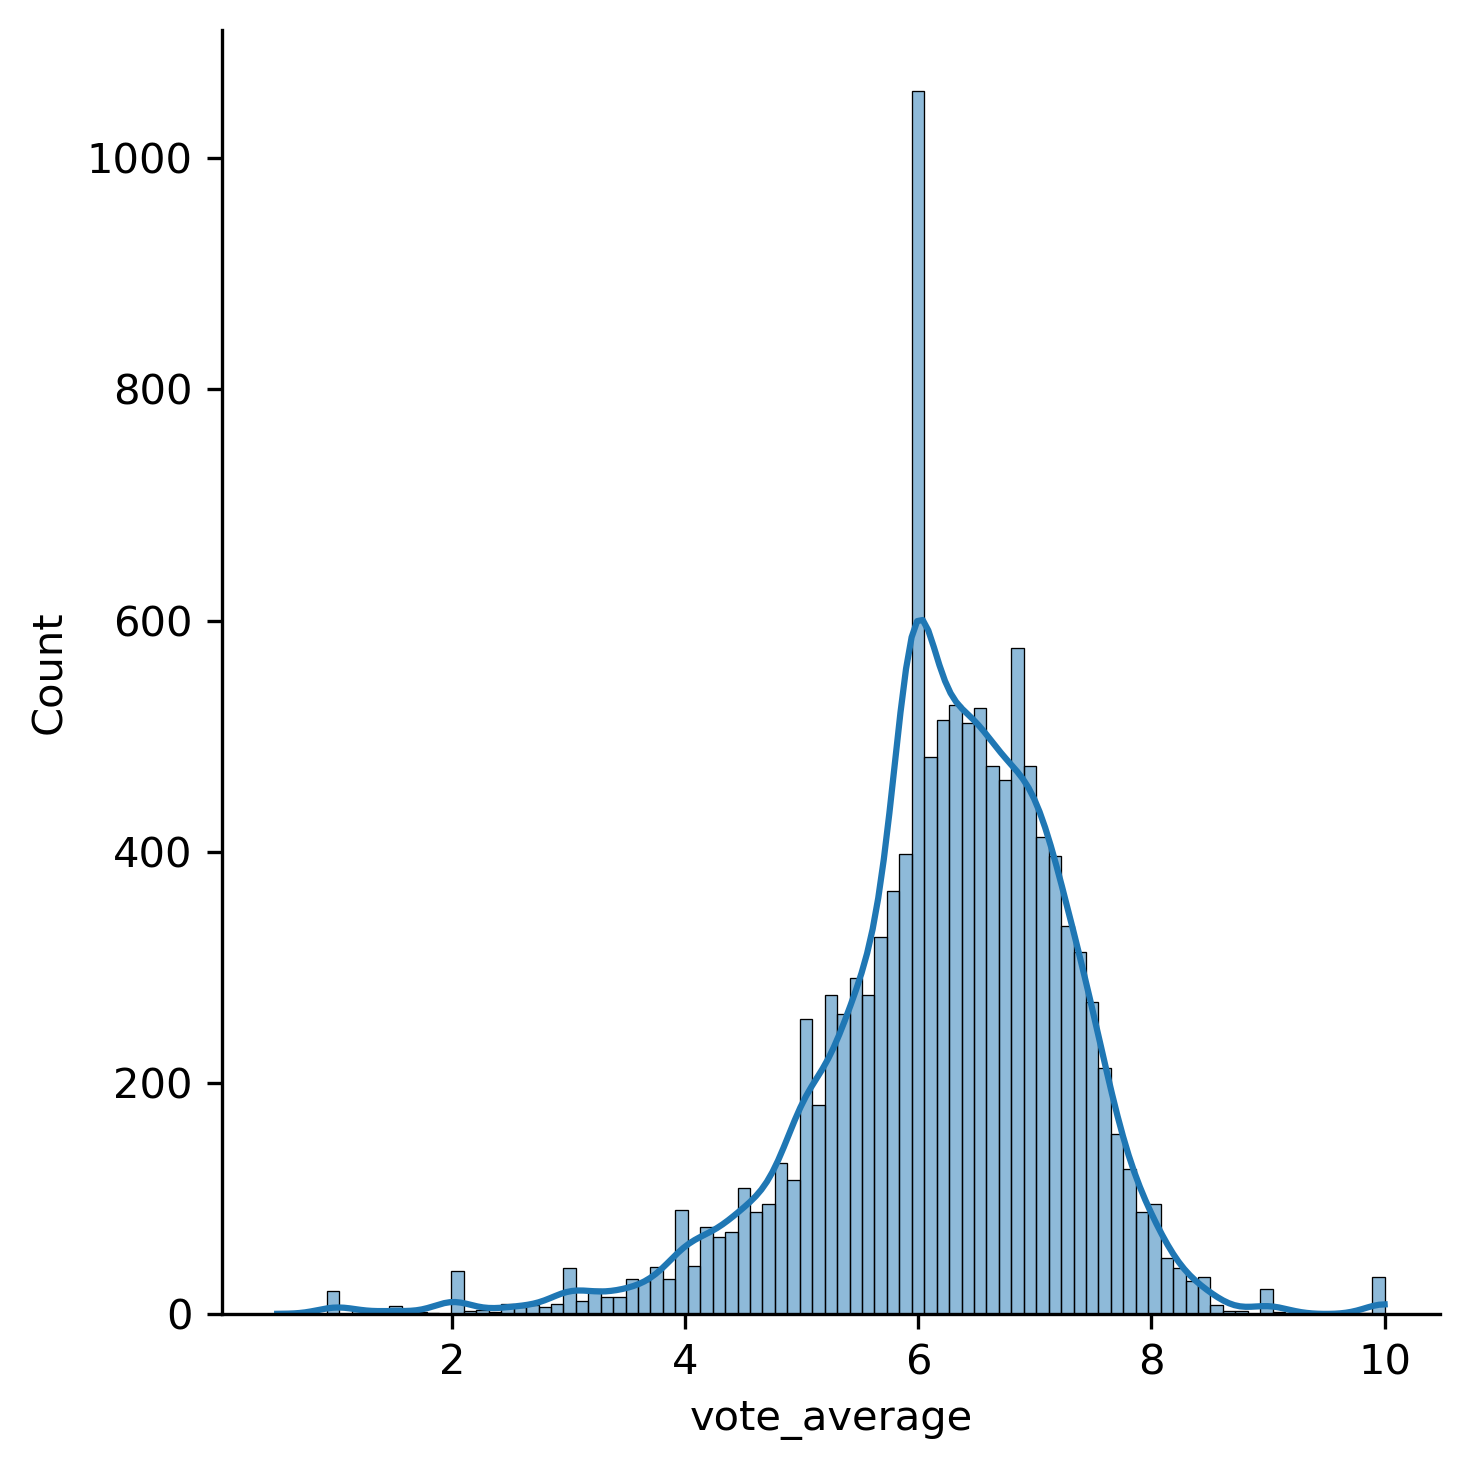

In [23]:
sns.displot(data['vote_average'],kde=True)
plt.show()

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black >  Most of the movies are rated in the range of 6-8. The largest number of movies with a rating of about 6. The number of movies with high and low scores is very rare, which is in line with the law of the market.
 

### <font face="Trebuchet MS" size= 3 color=black >4.2 Relationship between runtime and ratings

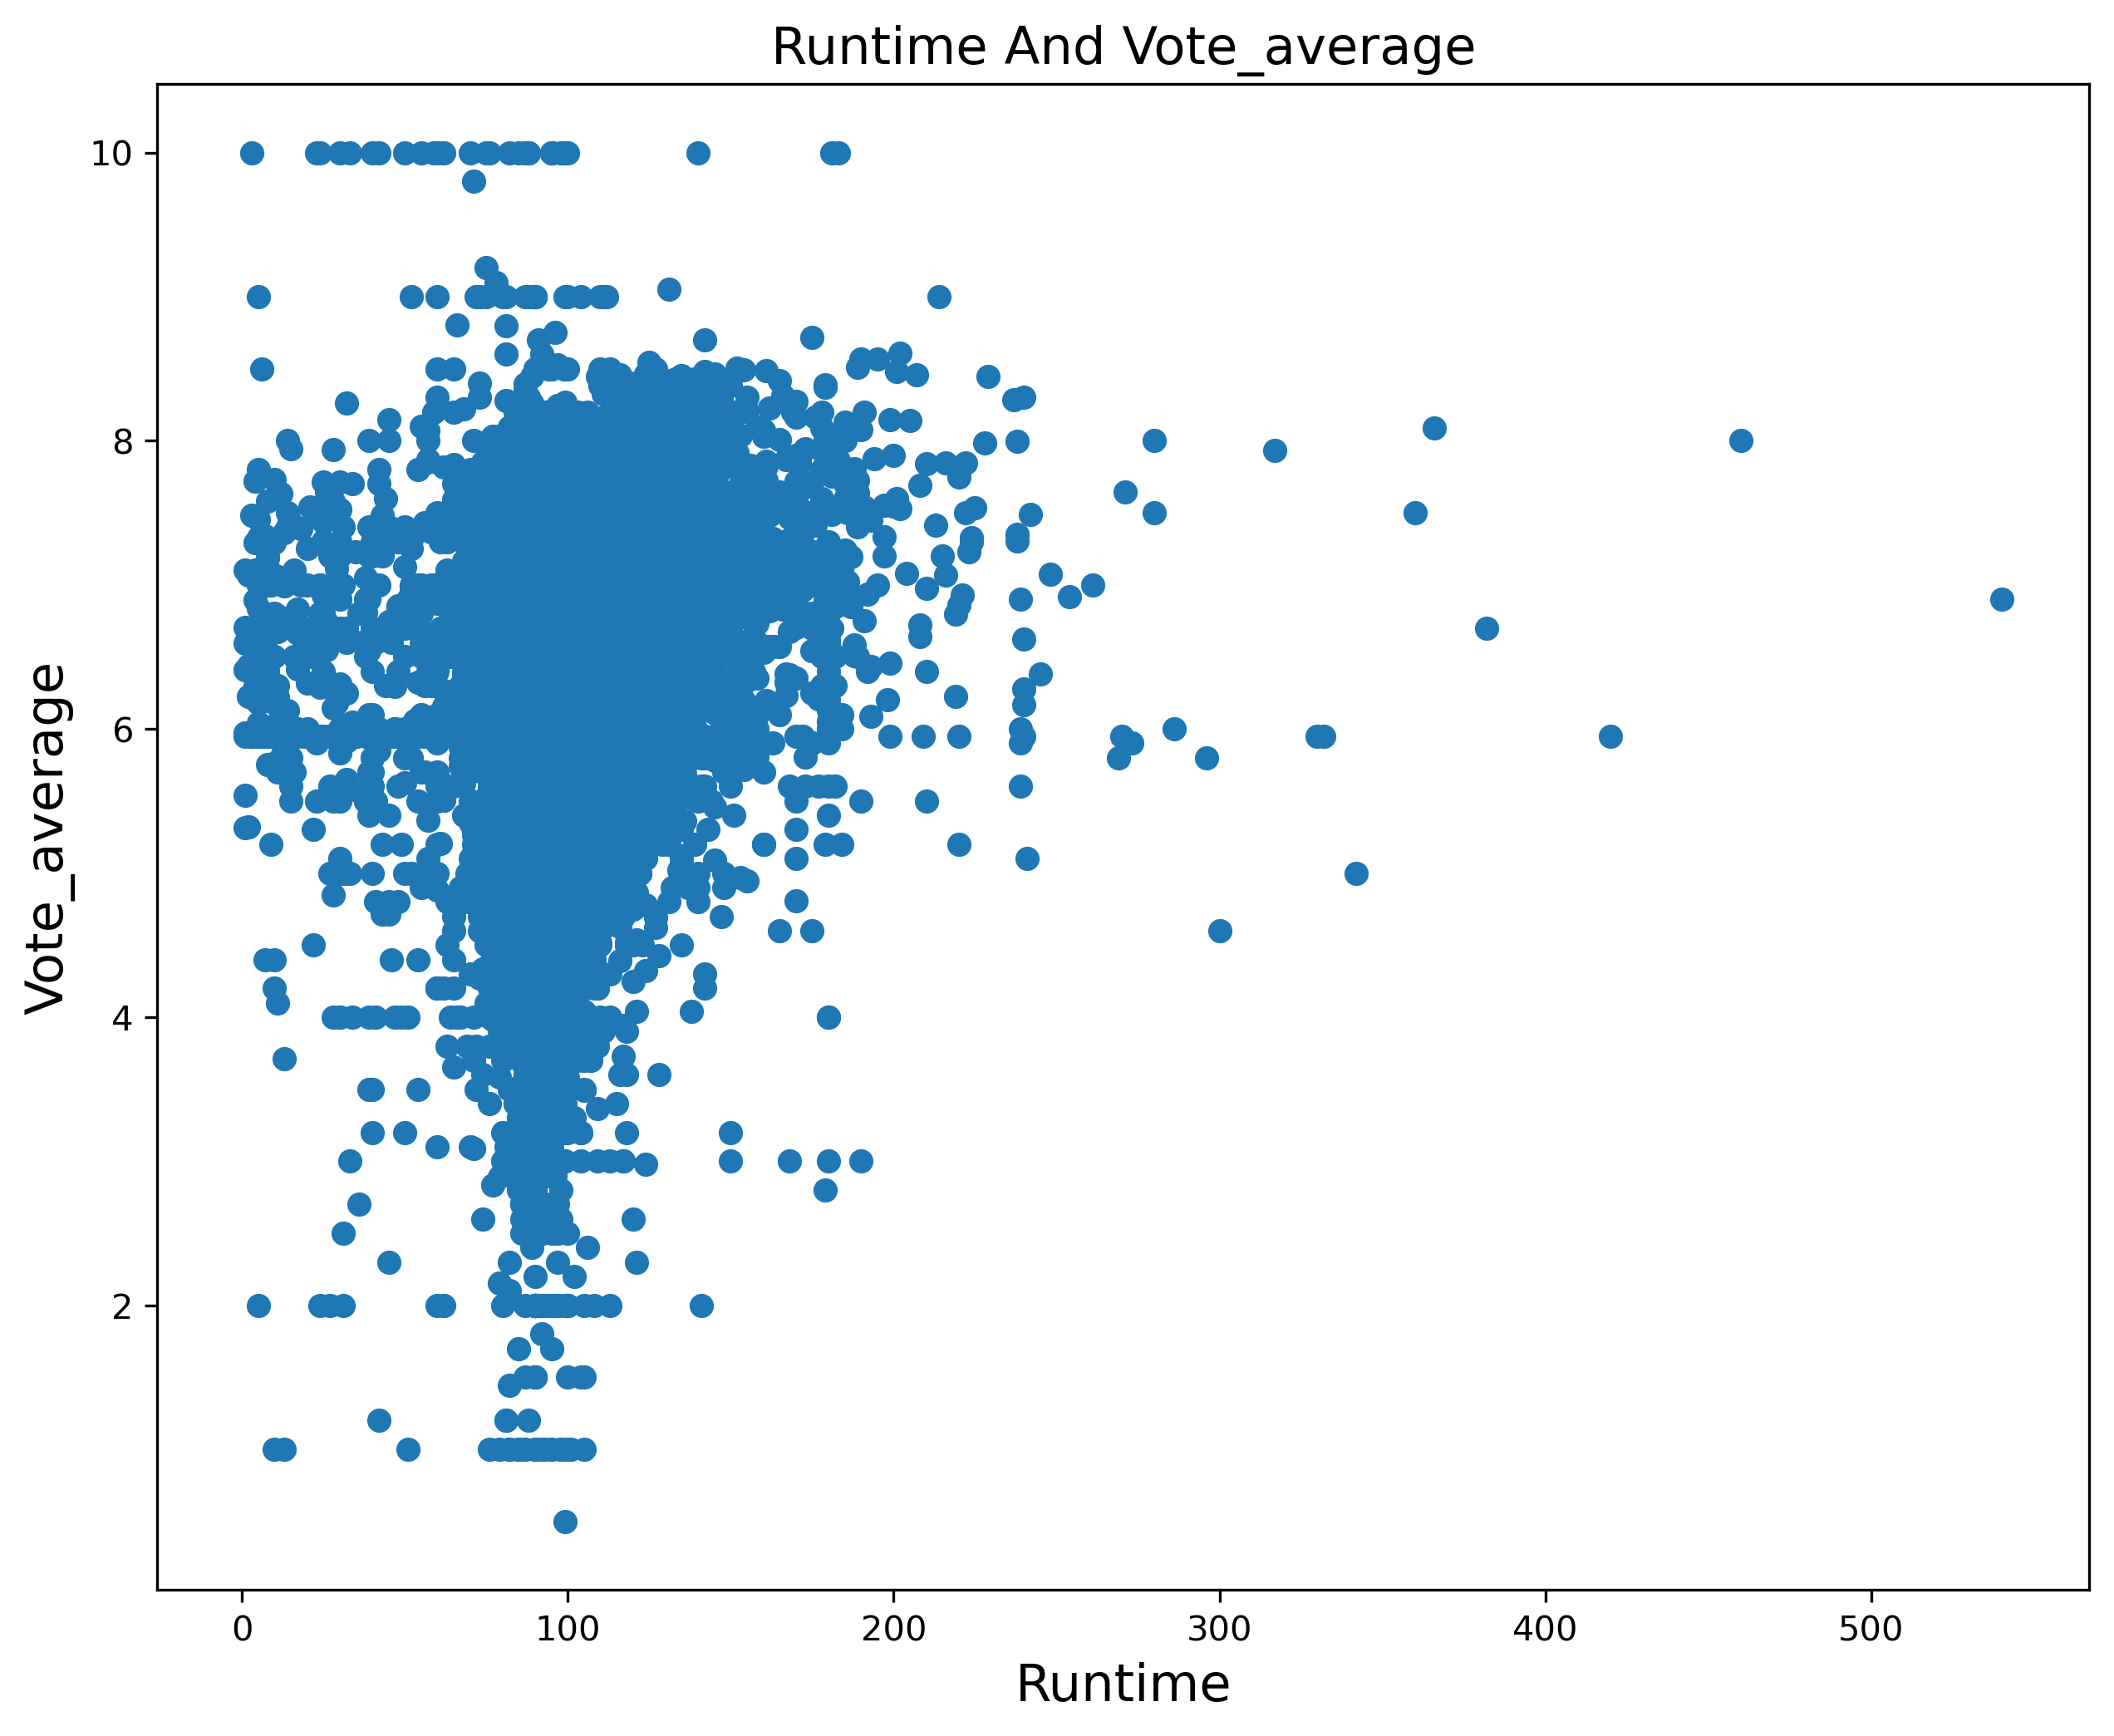

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(data['runtime'],data['vote_average'])
plt.title('Runtime And Vote_average',fontsize=15)
plt.xlabel('Runtime',fontsize=15)
plt.ylabel('Vote_average',fontsize=15)
plt.show()


&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black >  Most of the movies are rated in the range of 6-8. The largest number of movies with a rating of about 6. The number of high-rated movies is between 100 and 200 minutes long. With a runtime increase of more than two hundred minutes, the rating is not low.

### <font face="Trebuchet MS" size= 3 color=black >4.3 Relationship between ratings and popularity

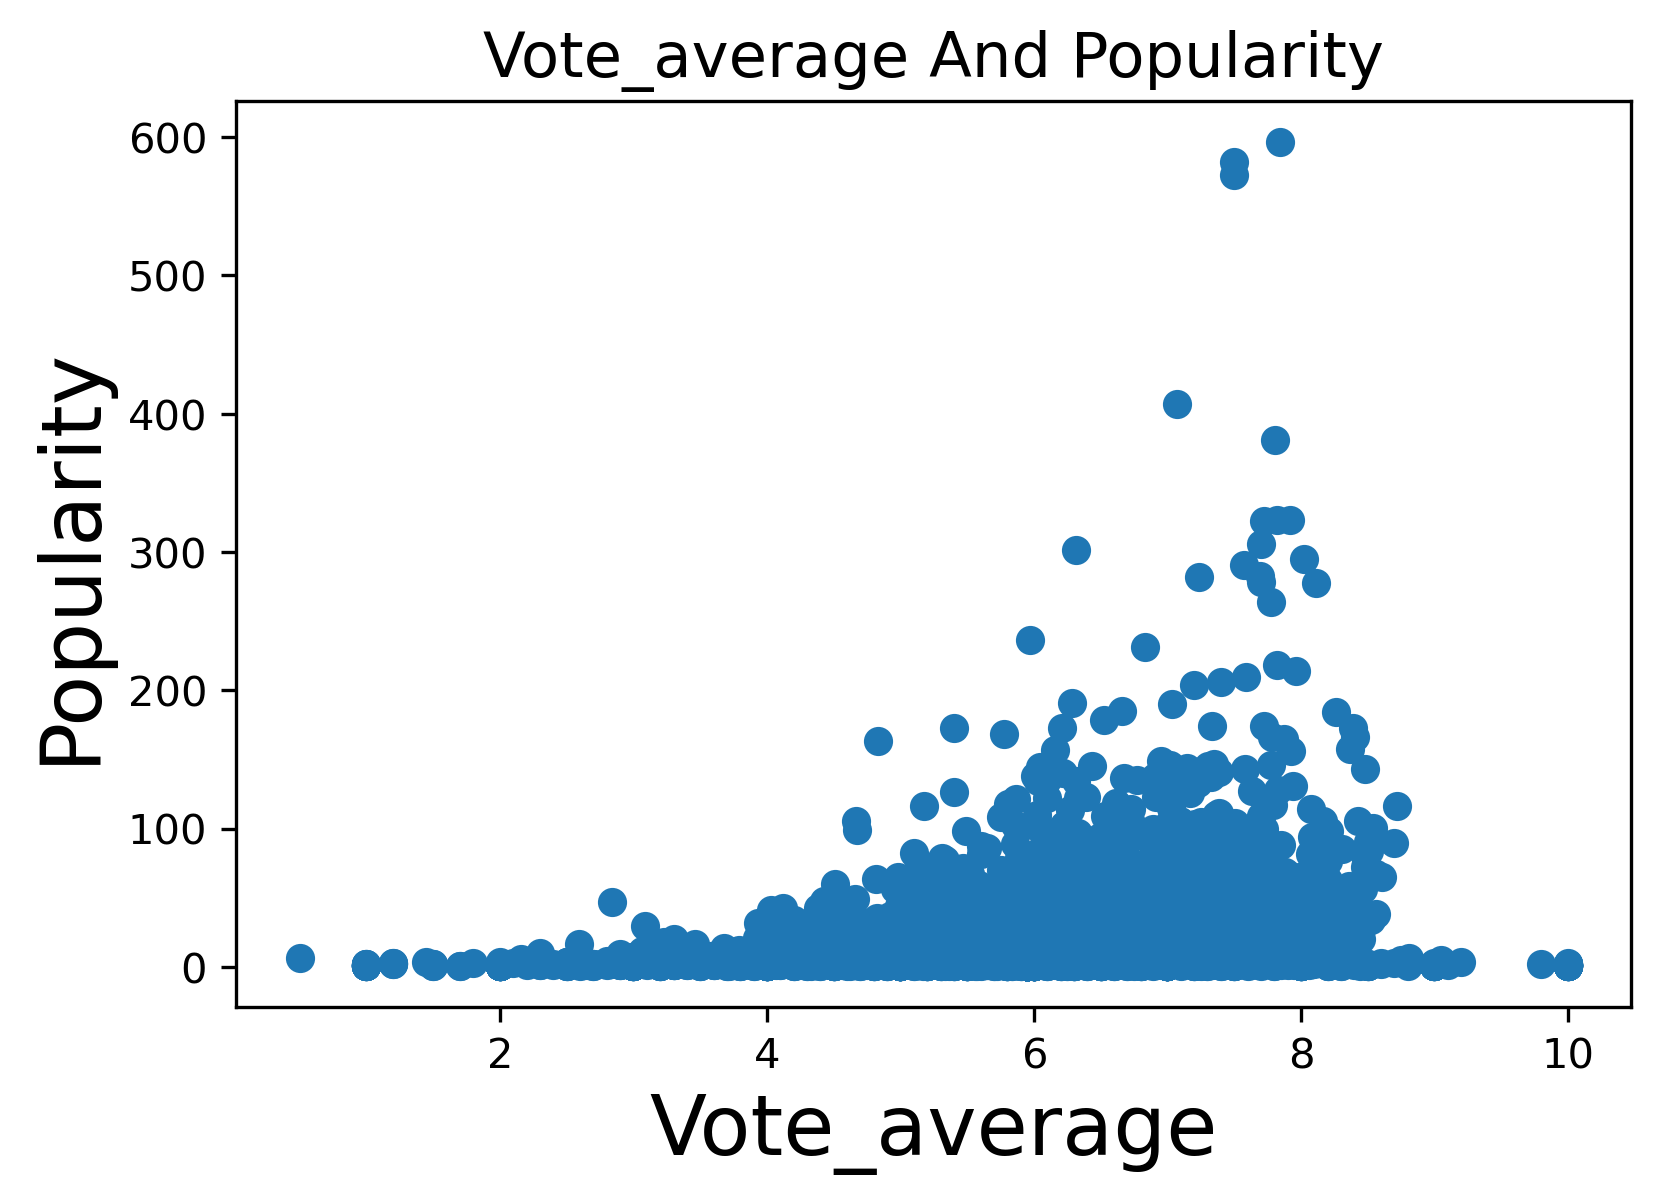

In [25]:
plt.scatter(data['vote_average'],data['popularity'])
plt.title('Vote_average And Popularity',fontsize=15)
plt.xlabel('Vote_average', fontsize=20)
plt.ylabel('Popularity', fontsize=20)
plt.show()


&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black >  Most popular movies have ratings between 6 and 9. However, there is no shortage of movies with high ratings but shallow popularity.

### <font face="Trebuchet MS" size= 3 color=black >4.4 Relationship between ratings and revenue

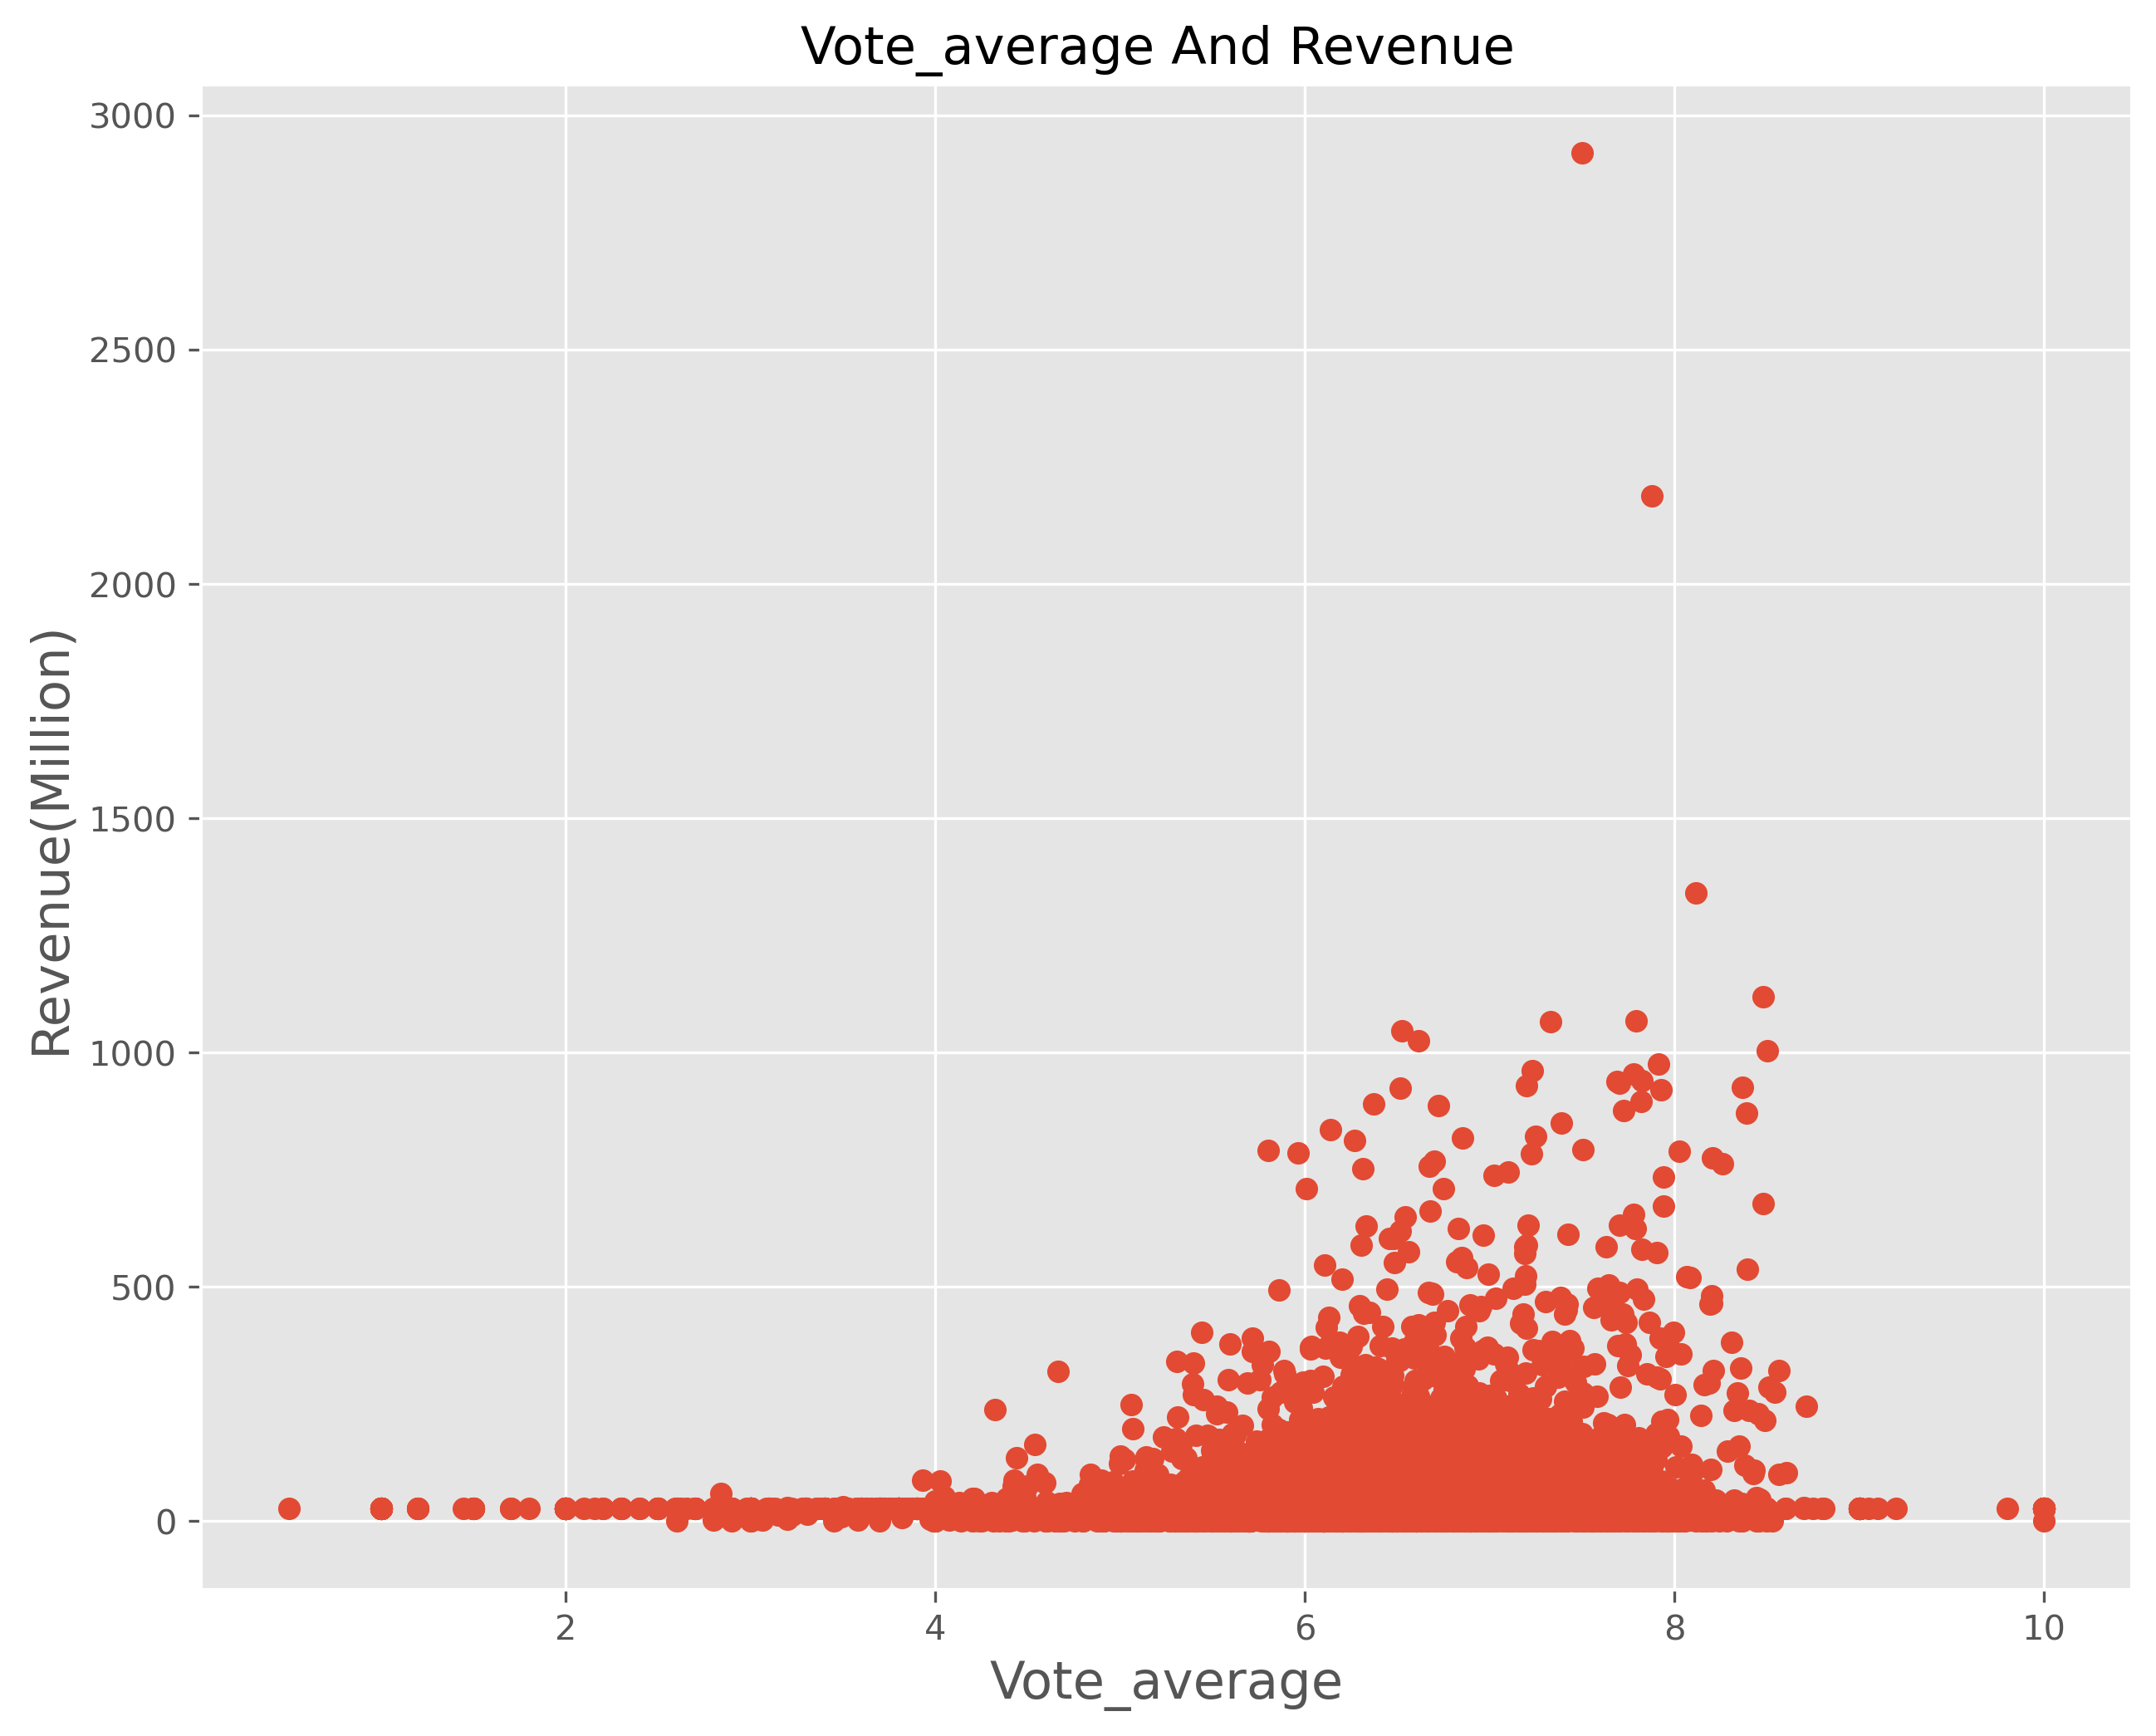

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
re =[ i / 1000000 for i in data['revenue']]
plt.scatter(data['vote_average'],re)
plt.title('Vote_average And Revenue ',fontsize=15)
plt.xlabel('Vote_average',fontsize=15)
plt.ylabel('Revenue(Million)',fontsize=15)
plt.show()


&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Obviously, the higher the rating, the higher the movie tends to be at the box office. Nevertheless, there will still be some movies with higher ratings and fewer viewers.

### <font face="Trebuchet MS" size= 3 color=black >5.1 Relationship between budget and revenue

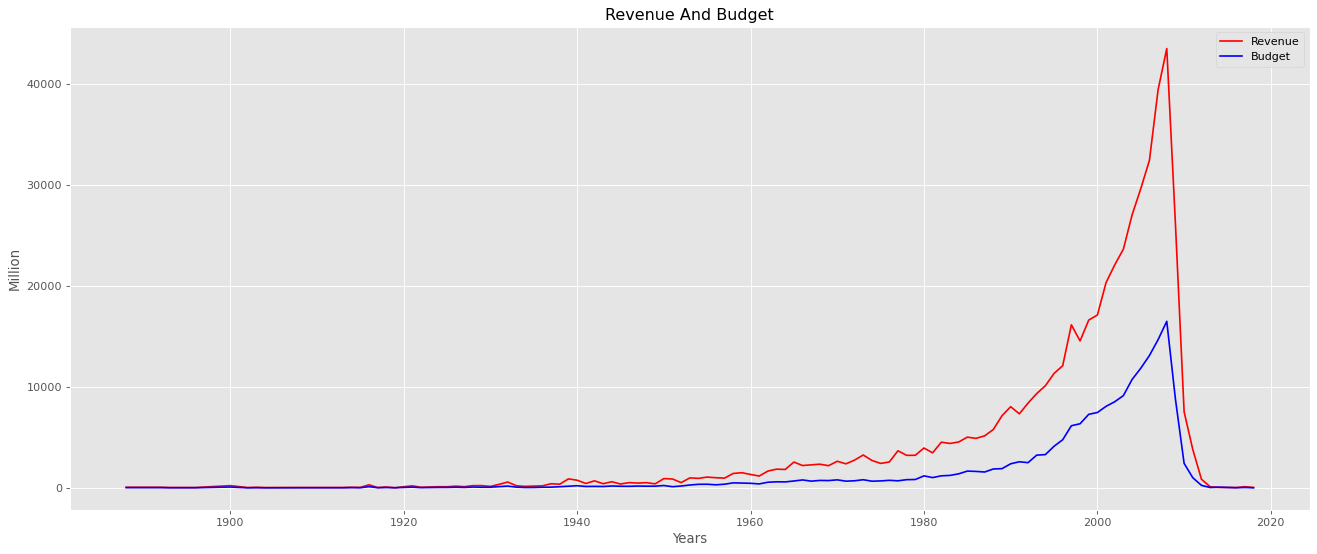

In [27]:
# 5. 预算

# 5.2  预算和收入 两条线
movie = data.groupby('release_date')['revenue'].sum()
movie2 = data.groupby('release_date')['budget'].sum()
plt.figure(figsize=(20,8),dpi=80)
x = movie.index.tolist()
y = [i/1000000 for i in movie]
y2 =[i/1000000 for i in movie2]
plt.plot(x,y,color= 'r',label= 'Revenue') # 标签未加
plt.plot(x,y2,color= 'b',label= 'Budget')
plt.xlabel('Years')
plt.ylabel('Million')
plt.title('Revenue And Budget')
plt.legend()
plt.show()


&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Increasing the budget of a film can improve its quality of the film. This can be well reflected in the box office. Since the 20th century, budgets have been increasing, reaching a peak around the 21st century, which may have a lot to do with the development of video technology in the late 20th century. Due to the lack of data afterward, the second half showed a decline, which was not the case.

### <font face="Trebuchet MS" size= 3 color=black >5.2 Budget for different types of movies

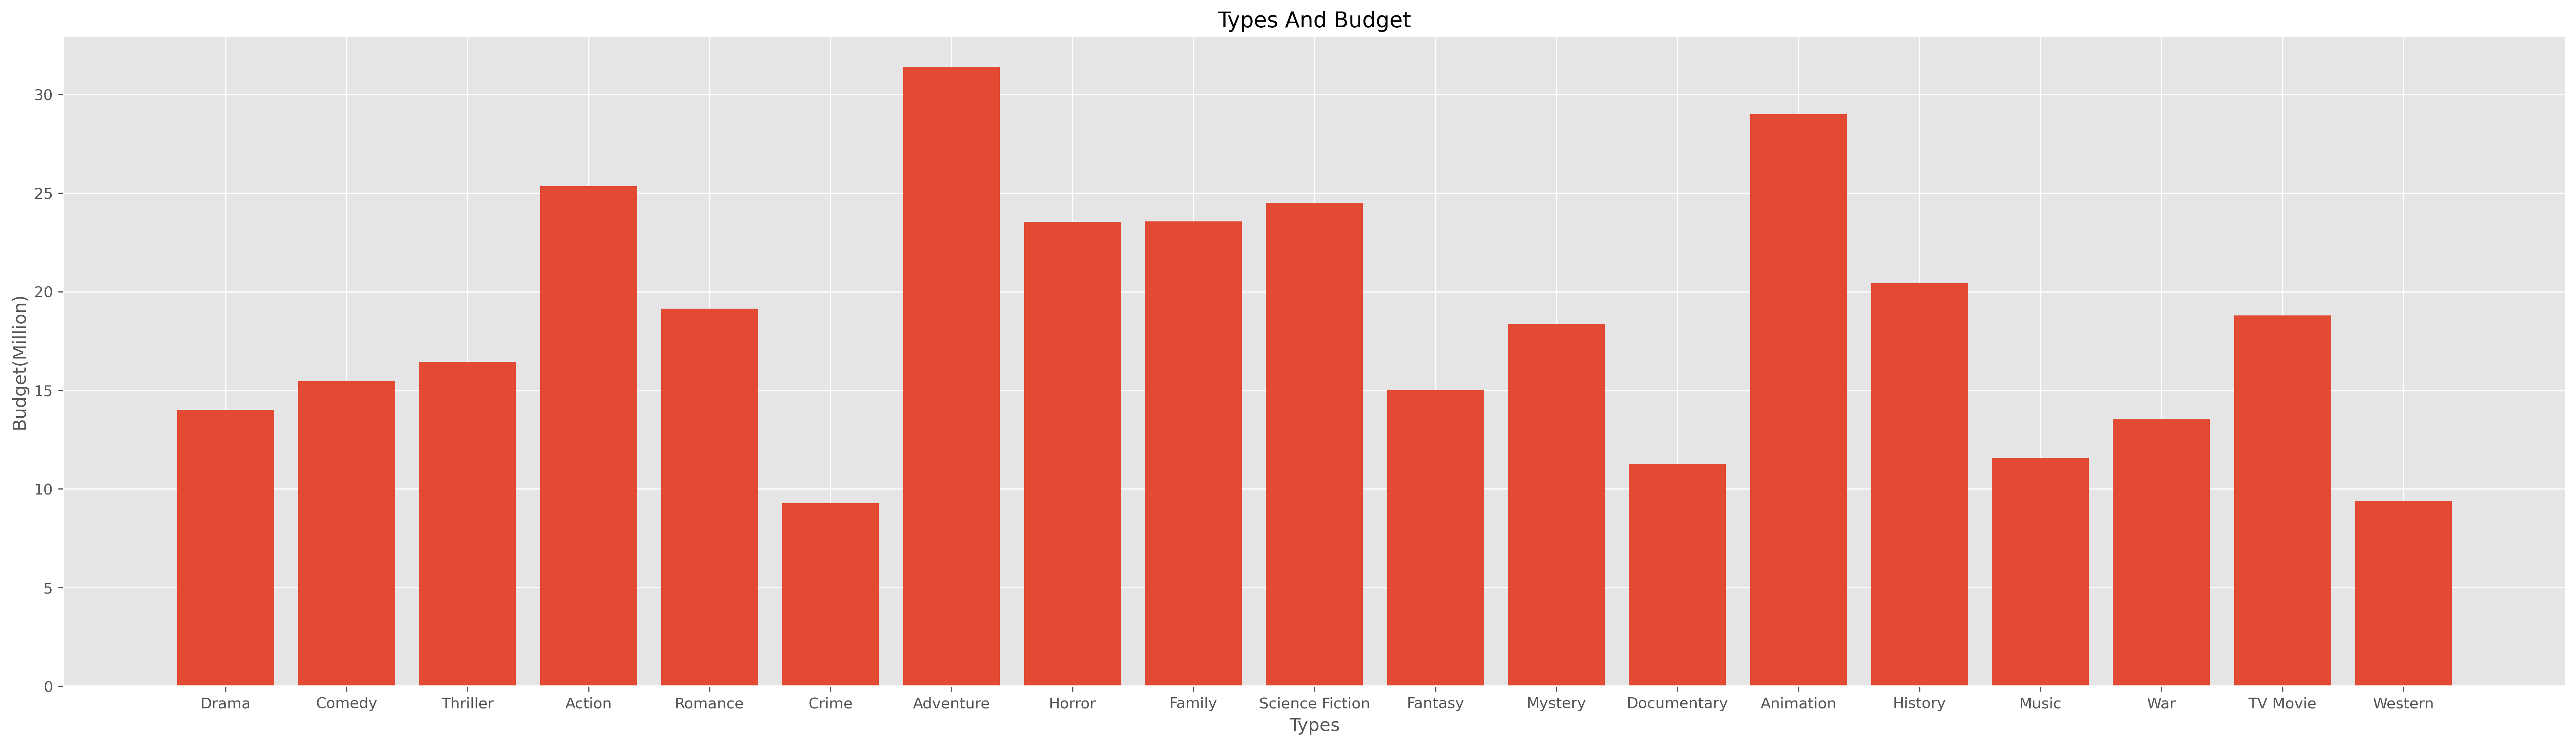

In [28]:
# 不同类型电影的预算
plt.figure(figsize=(30,8))
x = types
y = [i/1000000 for i in Budget]
plt.bar(x,y)
plt.xlabel('Types')
plt.ylabel('Budget(Million)')
plt.title('Types And Budget')
plt.show()

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Adventure, Animation film budget is the highest, followed by Action. At that time, the cost of making this type of movie was very high due to technical constraints. Compared to the largest number of Drama, the Comedy genre does not have as high a budget.

### <font face="Trebuchet MS" size= 3 color=black >5.3 Revenue for different types of movies

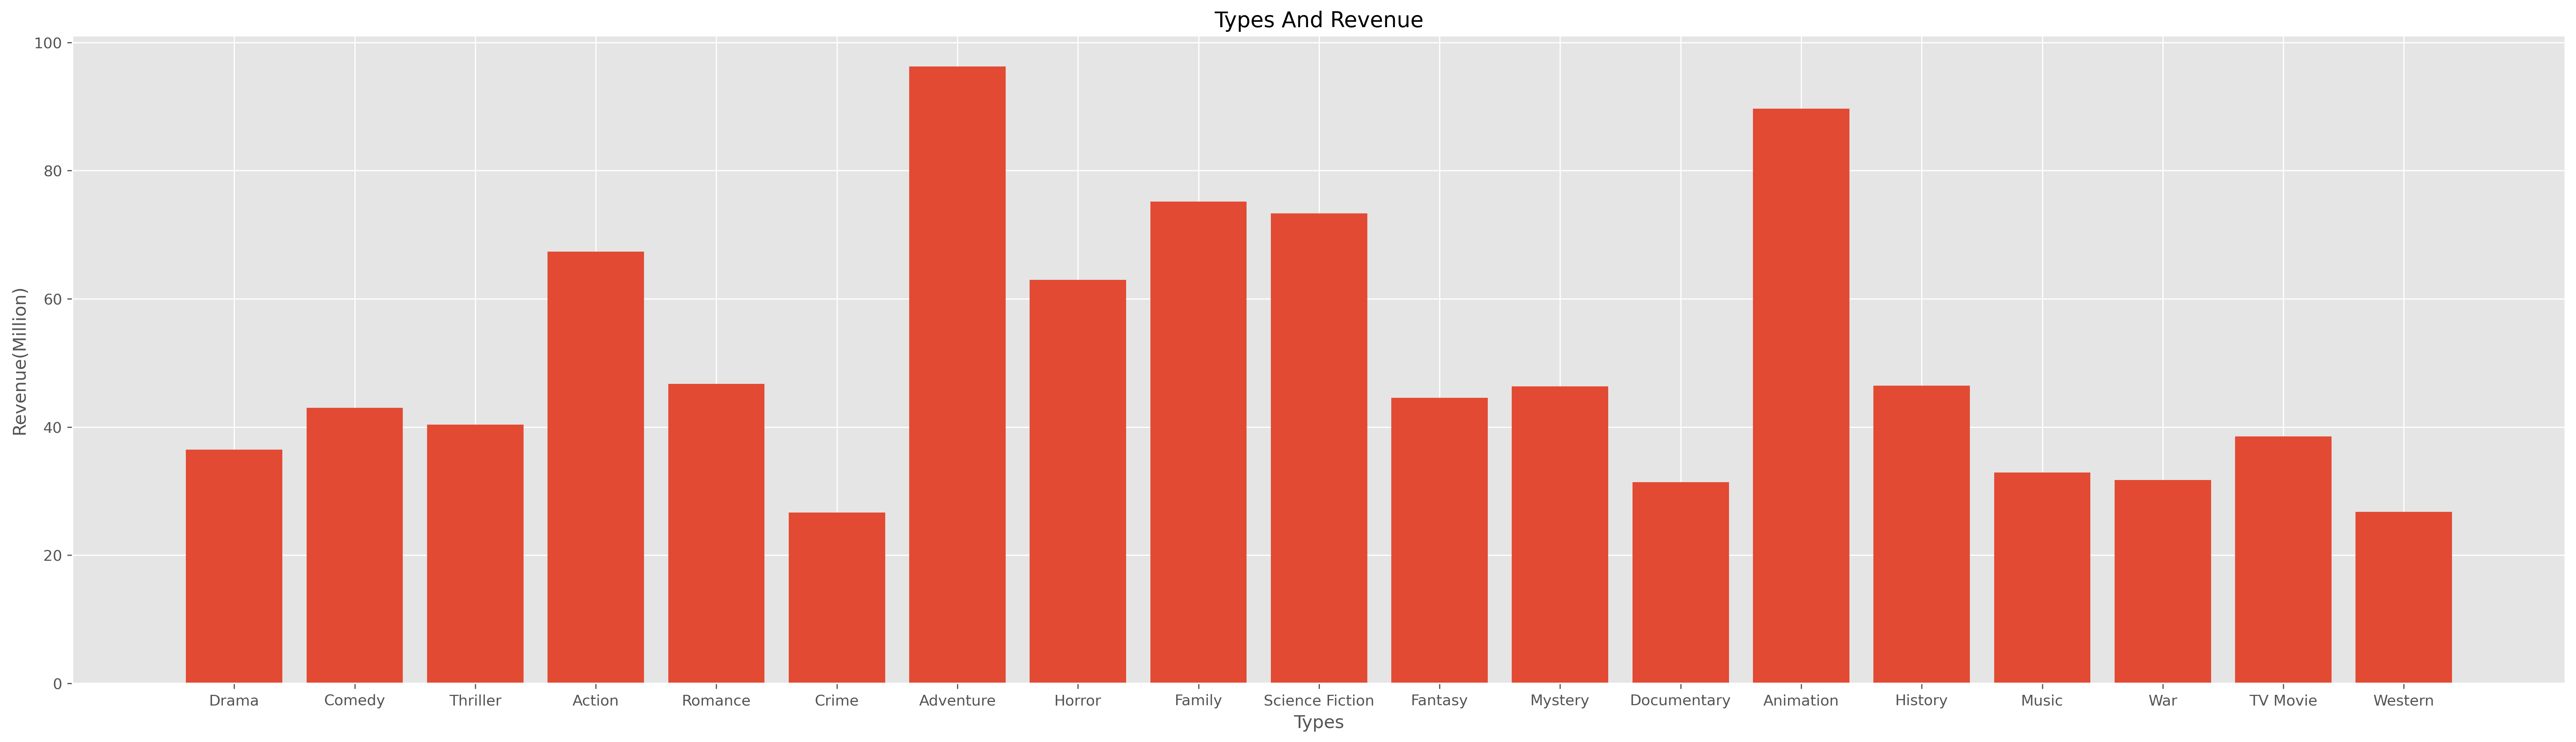

In [29]:
plt.figure(figsize=(30,8))
x = types
y = [i/1000000 for i in Revenue]
plt.bar(x,y)
plt.xlabel('Types')
plt.ylabel('Revenue(Million)')
plt.title('Types And Revenue')
plt.show()

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Adventure, Animation has high production costs and the highest box office revenues in this film category. Family and Science Fiction genre movies are not very good in the budget, but they are good in box office revenue. It may also be a wider audience. The crime genre is the lowest in terms of investment and box office revenue.

### <font face="Trebuchet MS" size= 3 color=black >6.Relationship between features

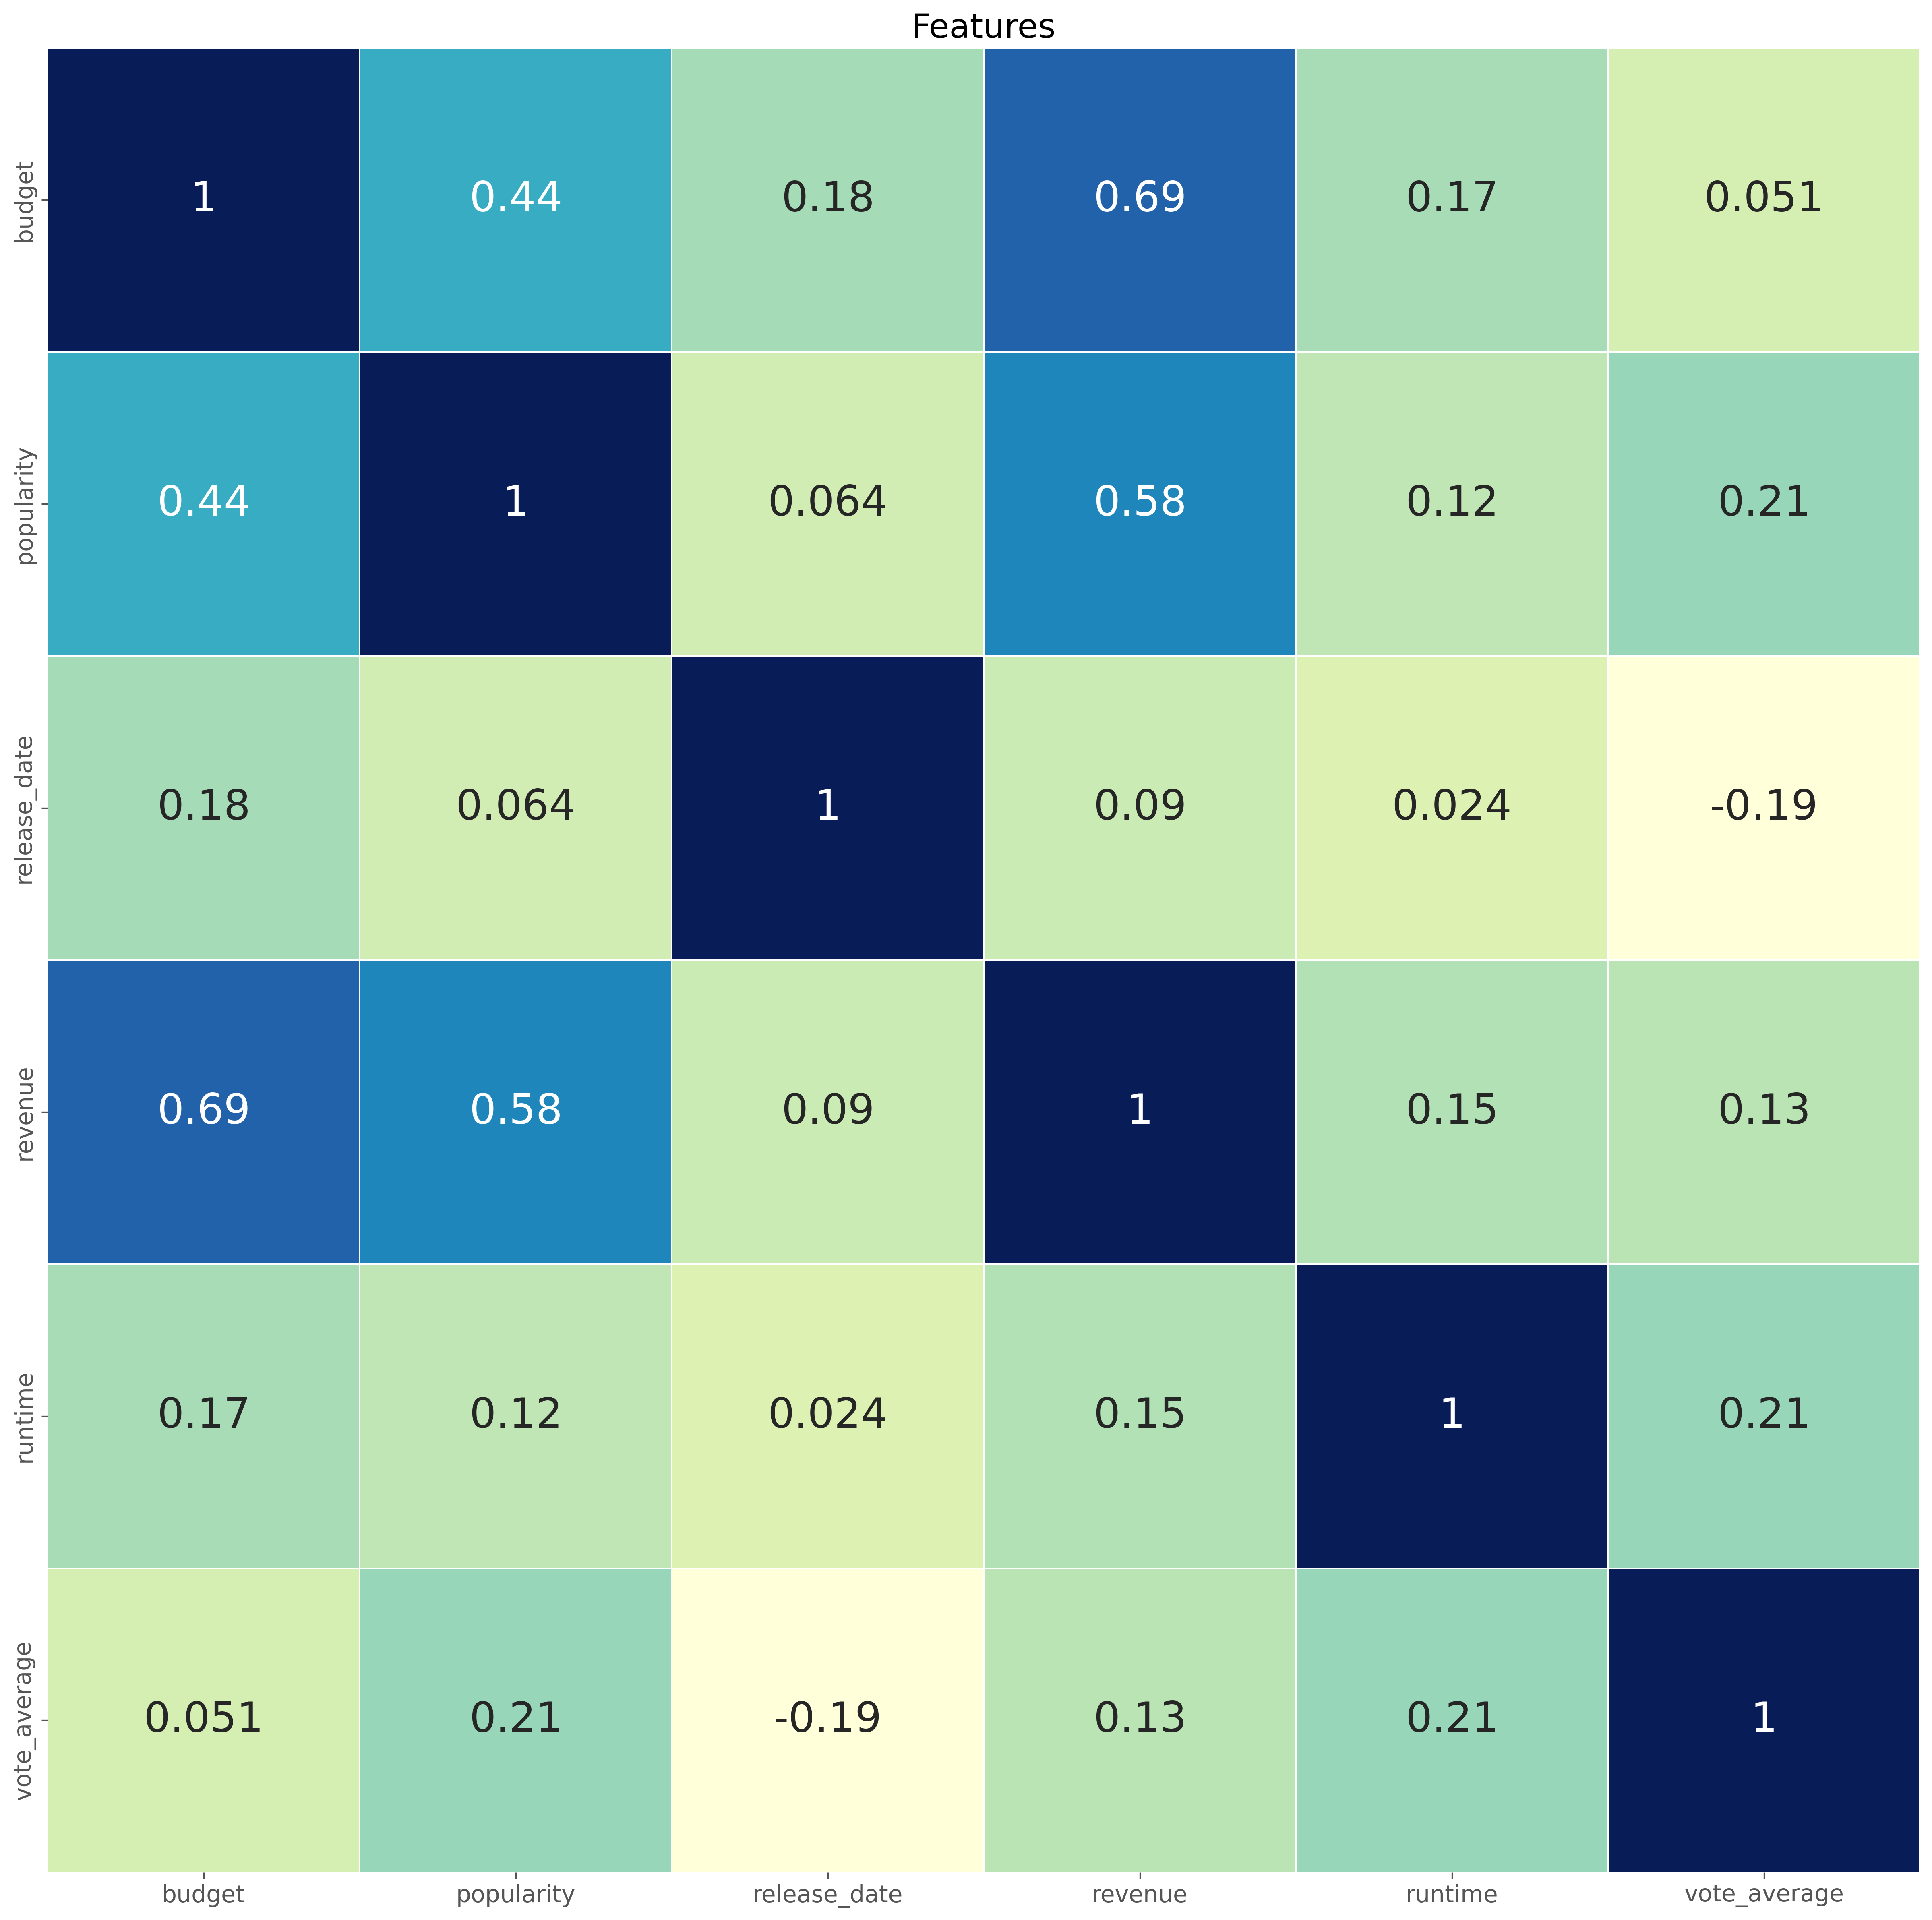

In [30]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),vmax = 1, annot = True,linewidths = 0.5, cbar=False, cmap='YlGnBu',annot_kws={'fontsize':25})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Features',fontsize = 20)

plt.show()


&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Adventure, Animation has high production costs and the highest box office revenues in this film category. Family and Science Fiction genre movies are not very good in the budget, but they are good in box office revenue. It may also be a wider audience. The crime genre is the lowest in terms of investment and box office revenue.

## <font face="Trebuchet MS" size=3 color=black > Task 5: Conclusion

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > About twelve thousand valid movie data were analyzed for this assignment, mainly distributed in the 20th century. The information was analyzed mainly in genre, duration, region, rating, budget, and box office. 
    &emsp; &emsp;
    <br>1. The number of films shows a trend of increasing yearly, due to the data collection problem after 2005 began to decline. Moreover, the top 6 movie genres are Drama, Comedy, Thriller, Action, Romance, and Crime. Family, Animation, Science Fiction, Adventure, and Action are popular film genres.<br>2. The United States is the primary producer of movies, accounting for 47.28%, followed by Germany, France, and the United Kingdom. English language films accounted for 73.93 %, followed by German and French.<br>3. The most popular movies' length is between 90-120 minutes. Movies that are too long or too short are less popular. Longer movies tend to have higher ratings.<br>4. The ratings are mainly concentrated on 6-8 points. High movies tend to last longer. Movies with high ratings are not necessarily popular, and there may be good cold movies.<br>5. With a high budget investment, the quality of the movie will be higher, and the box office obtained will be higher. The two types of movies with high budgets and high box office are Adventure and Animation.<br>6. The correlation between budget, popularity, and box office is the strongest. The high box office is usually associated with high popularity and a high budget.

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > In the 21st century, the drama, comedy, and family genres have endured. Thanks to the constant experimentation and accumulation of the 20th century. In the 21st century, with the introduction of new technologies and higher budgets, the film industry has taken on a higher dimension. However, the future is full of all kinds of uncertainties. Newer types of films may be created, and newer film technologies may disrupt the existing model. 